# Hit or flop - song success prediction based on spotify data
## Data mining kurzus miniprojekt
#### Source of data: https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset
#### @author: Pipis Bence, Heller Farkas Szakkollégium
#### 2021

#### The following description is the copy of the original one on kaggle, made by the author of the dataset:
* track: name of the track
* artist: name of the artist 
* uri: resource identifier for the track
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 
* key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
* instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0
* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
* duration_ms:  The duration of the track in milliseconds.
* time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
* chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. 
* sections: The number of sections the particular track has
* target: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.


## Goal is to create boosting models for every decade and make a comparison how successful is a decade's trained model to predict the next decade's hits. The better it is the more similar the hits in the decades.


### Importing necessary packages

In [5]:
# general packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from tabulate import tabulate
import seaborn as sns
from IPython import display
from functions import random_forest_estimator, gradient_boosting_estimator, check_accuracy, import_data


# sklearn tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, plot_roc_curve

### Importing data

In [6]:
# read files to dictionary
df_dict = import_data("Kaggle_data")

In [6]:
# dropping na-s, not relevant columns
df_dict_clean = {}
for key, df in df_dict.items():
  df.dropna(inplace = True)
  df_dict_clean[key] = df.drop(columns=["track", "artist", "uri"])

### Descriptive statistics, basic visualisation

In [ ]:
for key, df in df_dict_clean.items():
    print(key + "\n", tabulate(df.describe(include = ["int", "float"]), headers= 'keys', tablefmt = 'fancy_grid'))

dataset-of-00s
 ╒═══════╤════════════════╤═════════════╤════════════╤════════════╤═════════════╤═══════════════╤════════════════╤════════════════════╤═════════════╤═════════════╤═══════════╤══════════════════╤══════════════════╤══════════════╤════════════╤═════════════╕
│       │   danceability │      energy │        key │   loudness │        mode │   speechiness │   acousticness │   instrumentalness │    liveness │     valence │     tempo │      duration_ms │   time_signature │   chorus_hit │   sections │      target │
╞═══════╪════════════════╪═════════════╪════════════╪════════════╪═════════════╪═══════════════╪════════════════╪════════════════════╪═════════════╪═════════════╪═══════════╪══════════════════╪══════════════════╪══════════════╪════════════╪═════════════╡
│ count │    5872        │ 5872        │ 5872       │ 5872       │ 5872        │  5872         │   5872         │       5872         │ 5872        │ 5872        │ 5872      │   5872           │       5872       │    587


dataset-of-00s
----------------------------------------------



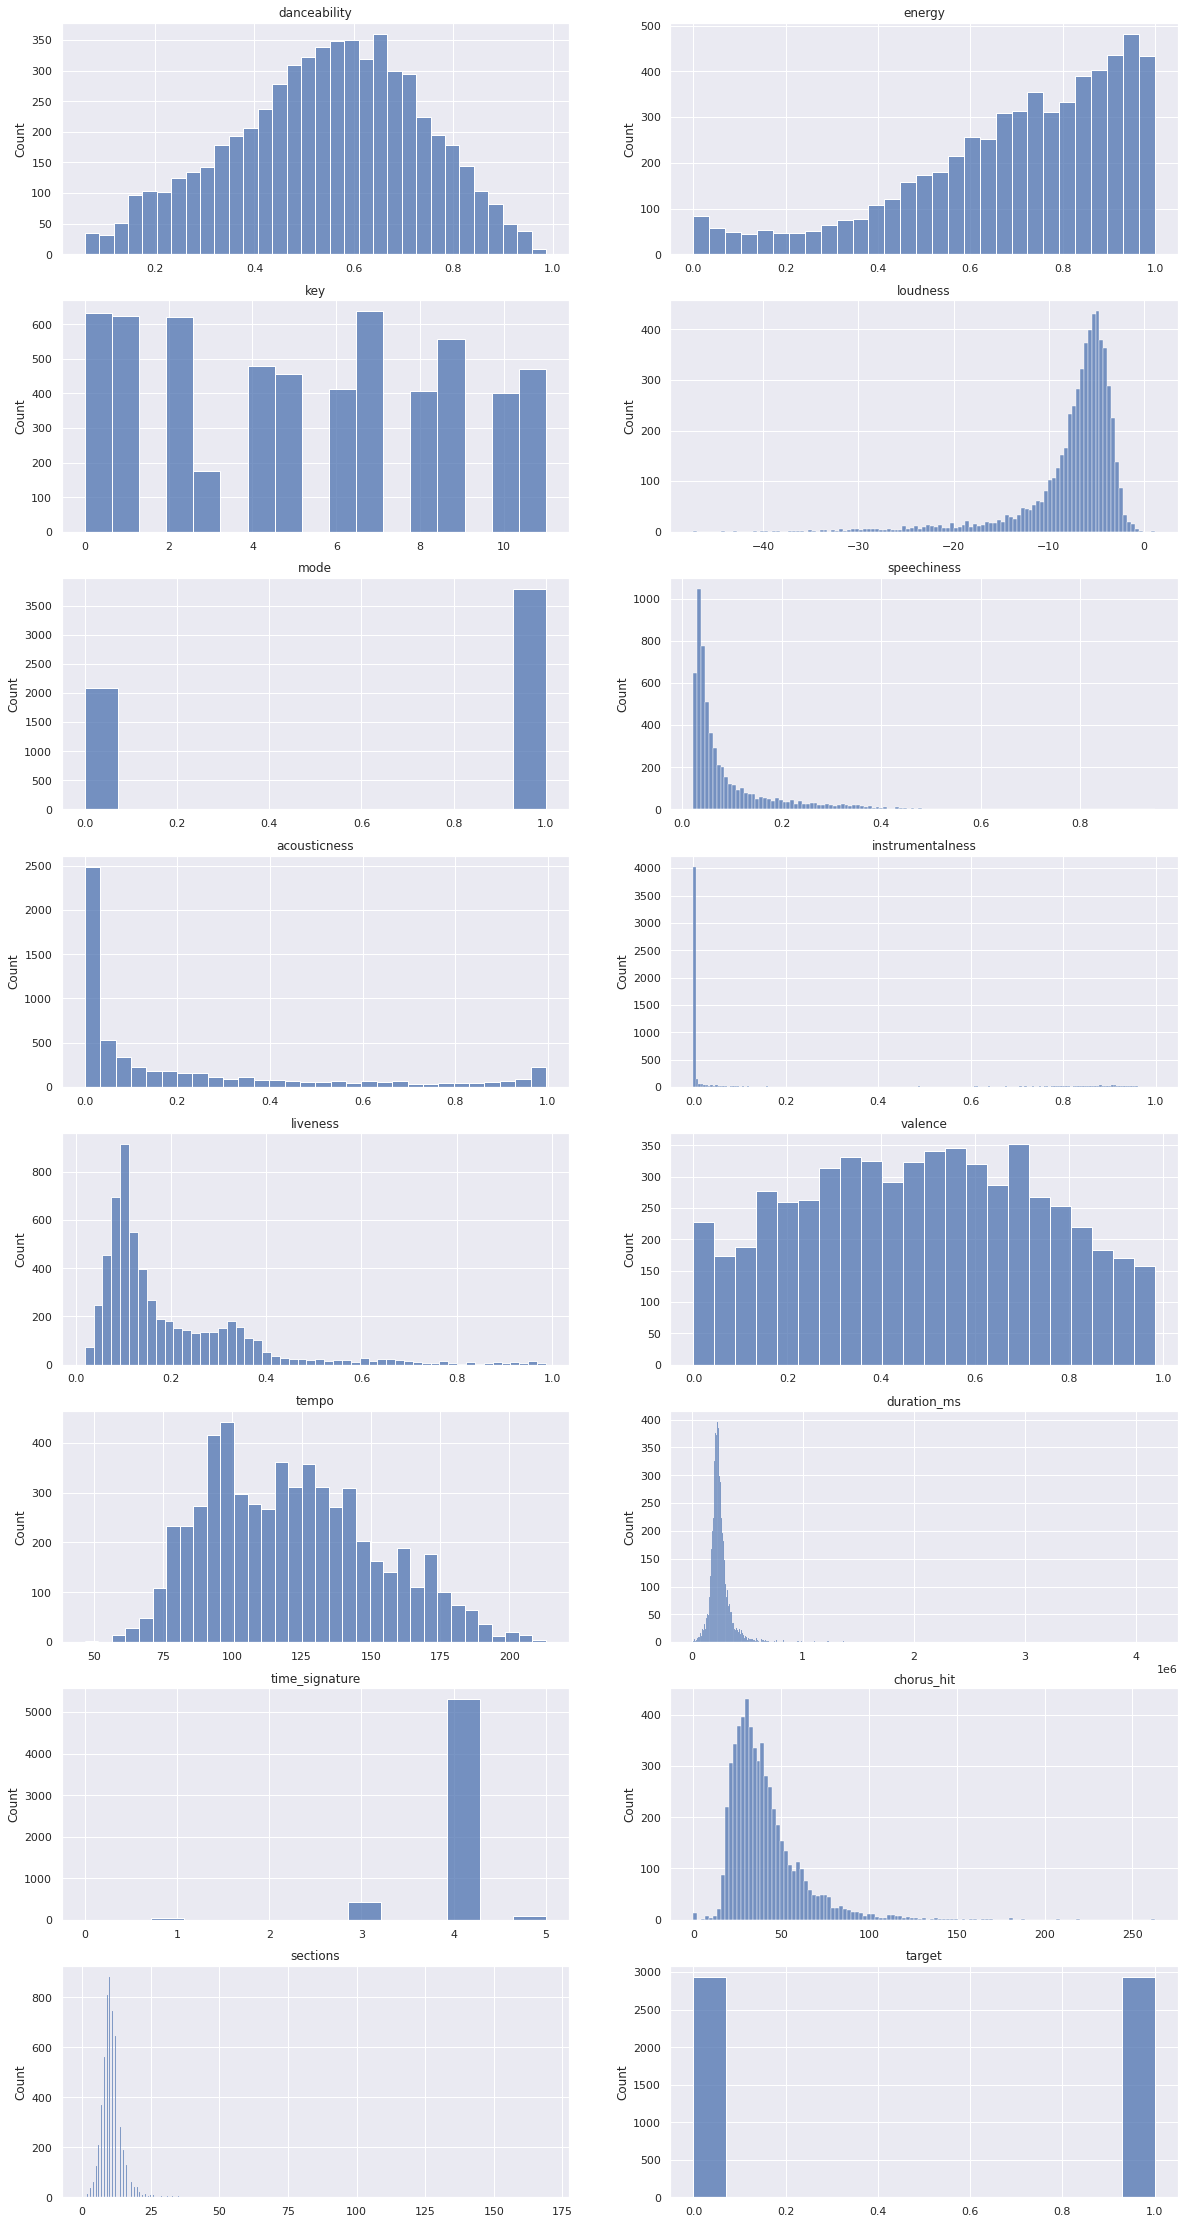


dataset-of-10s
----------------------------------------------



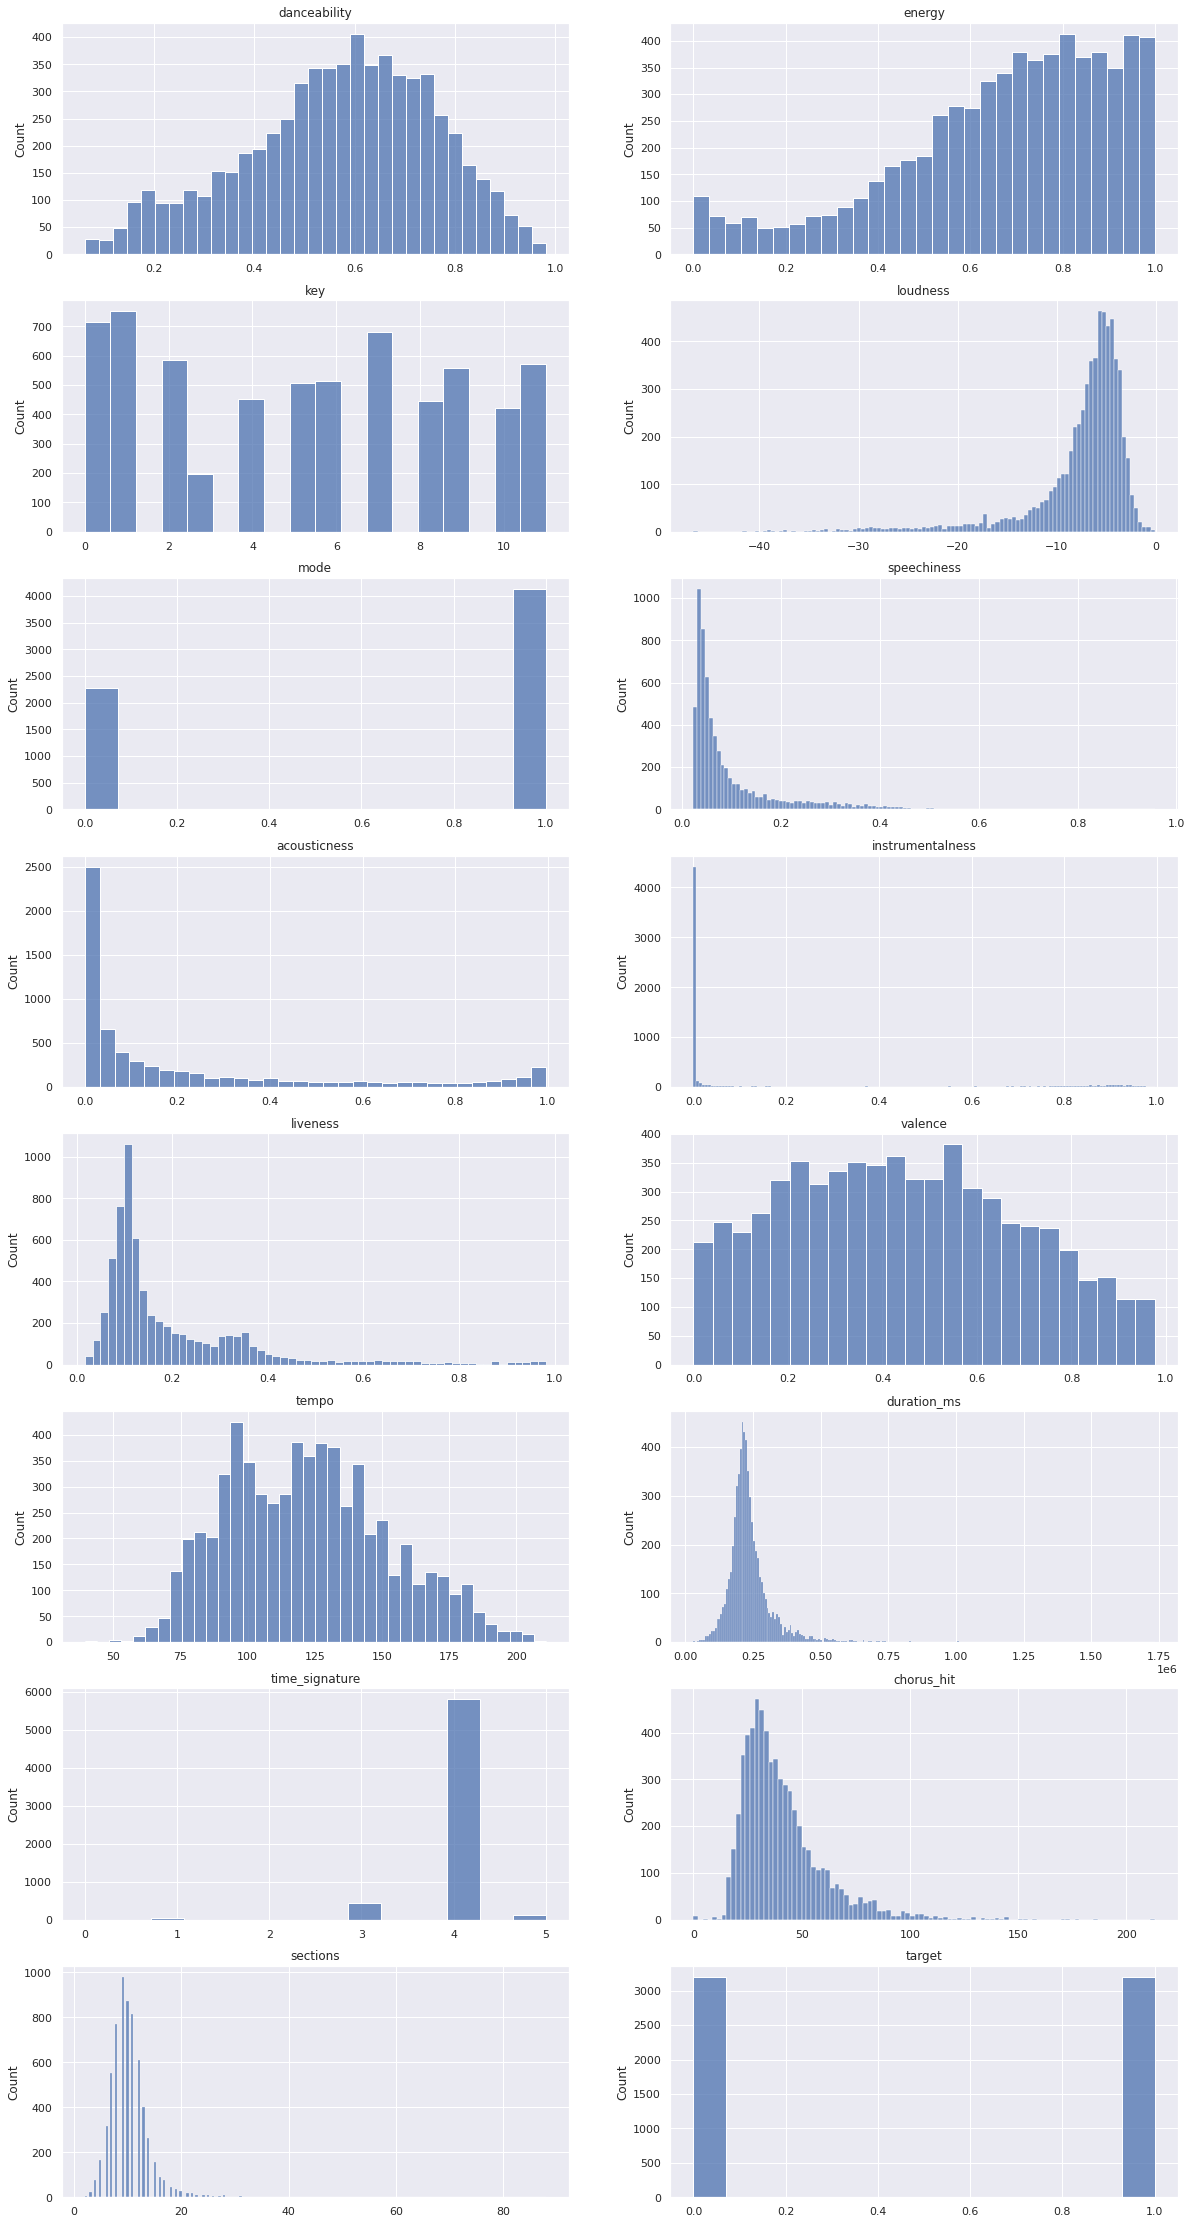


dataset-of-60s
----------------------------------------------



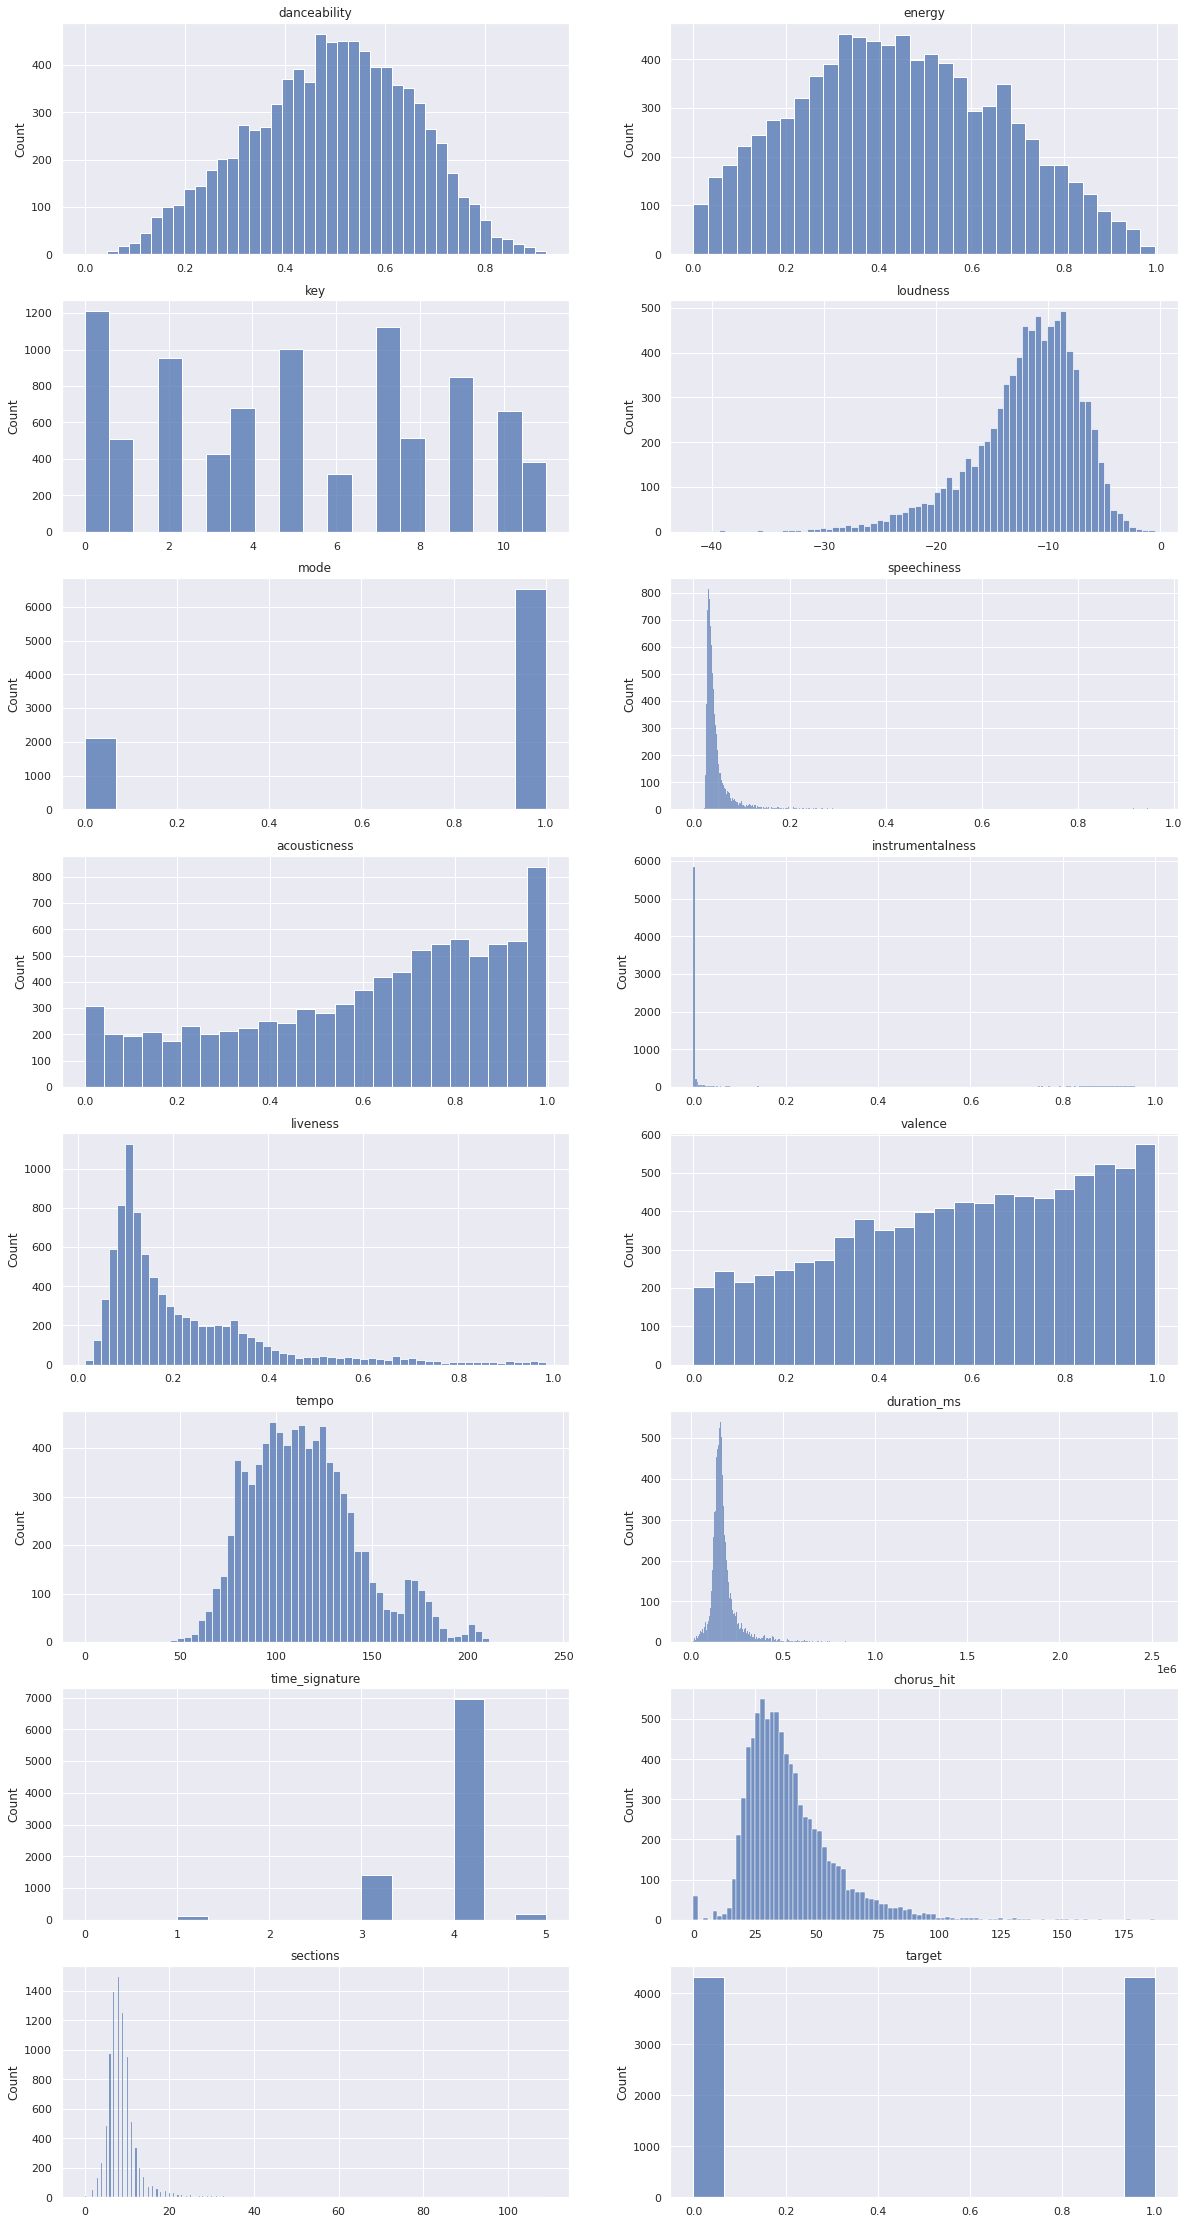


dataset-of-70s
----------------------------------------------



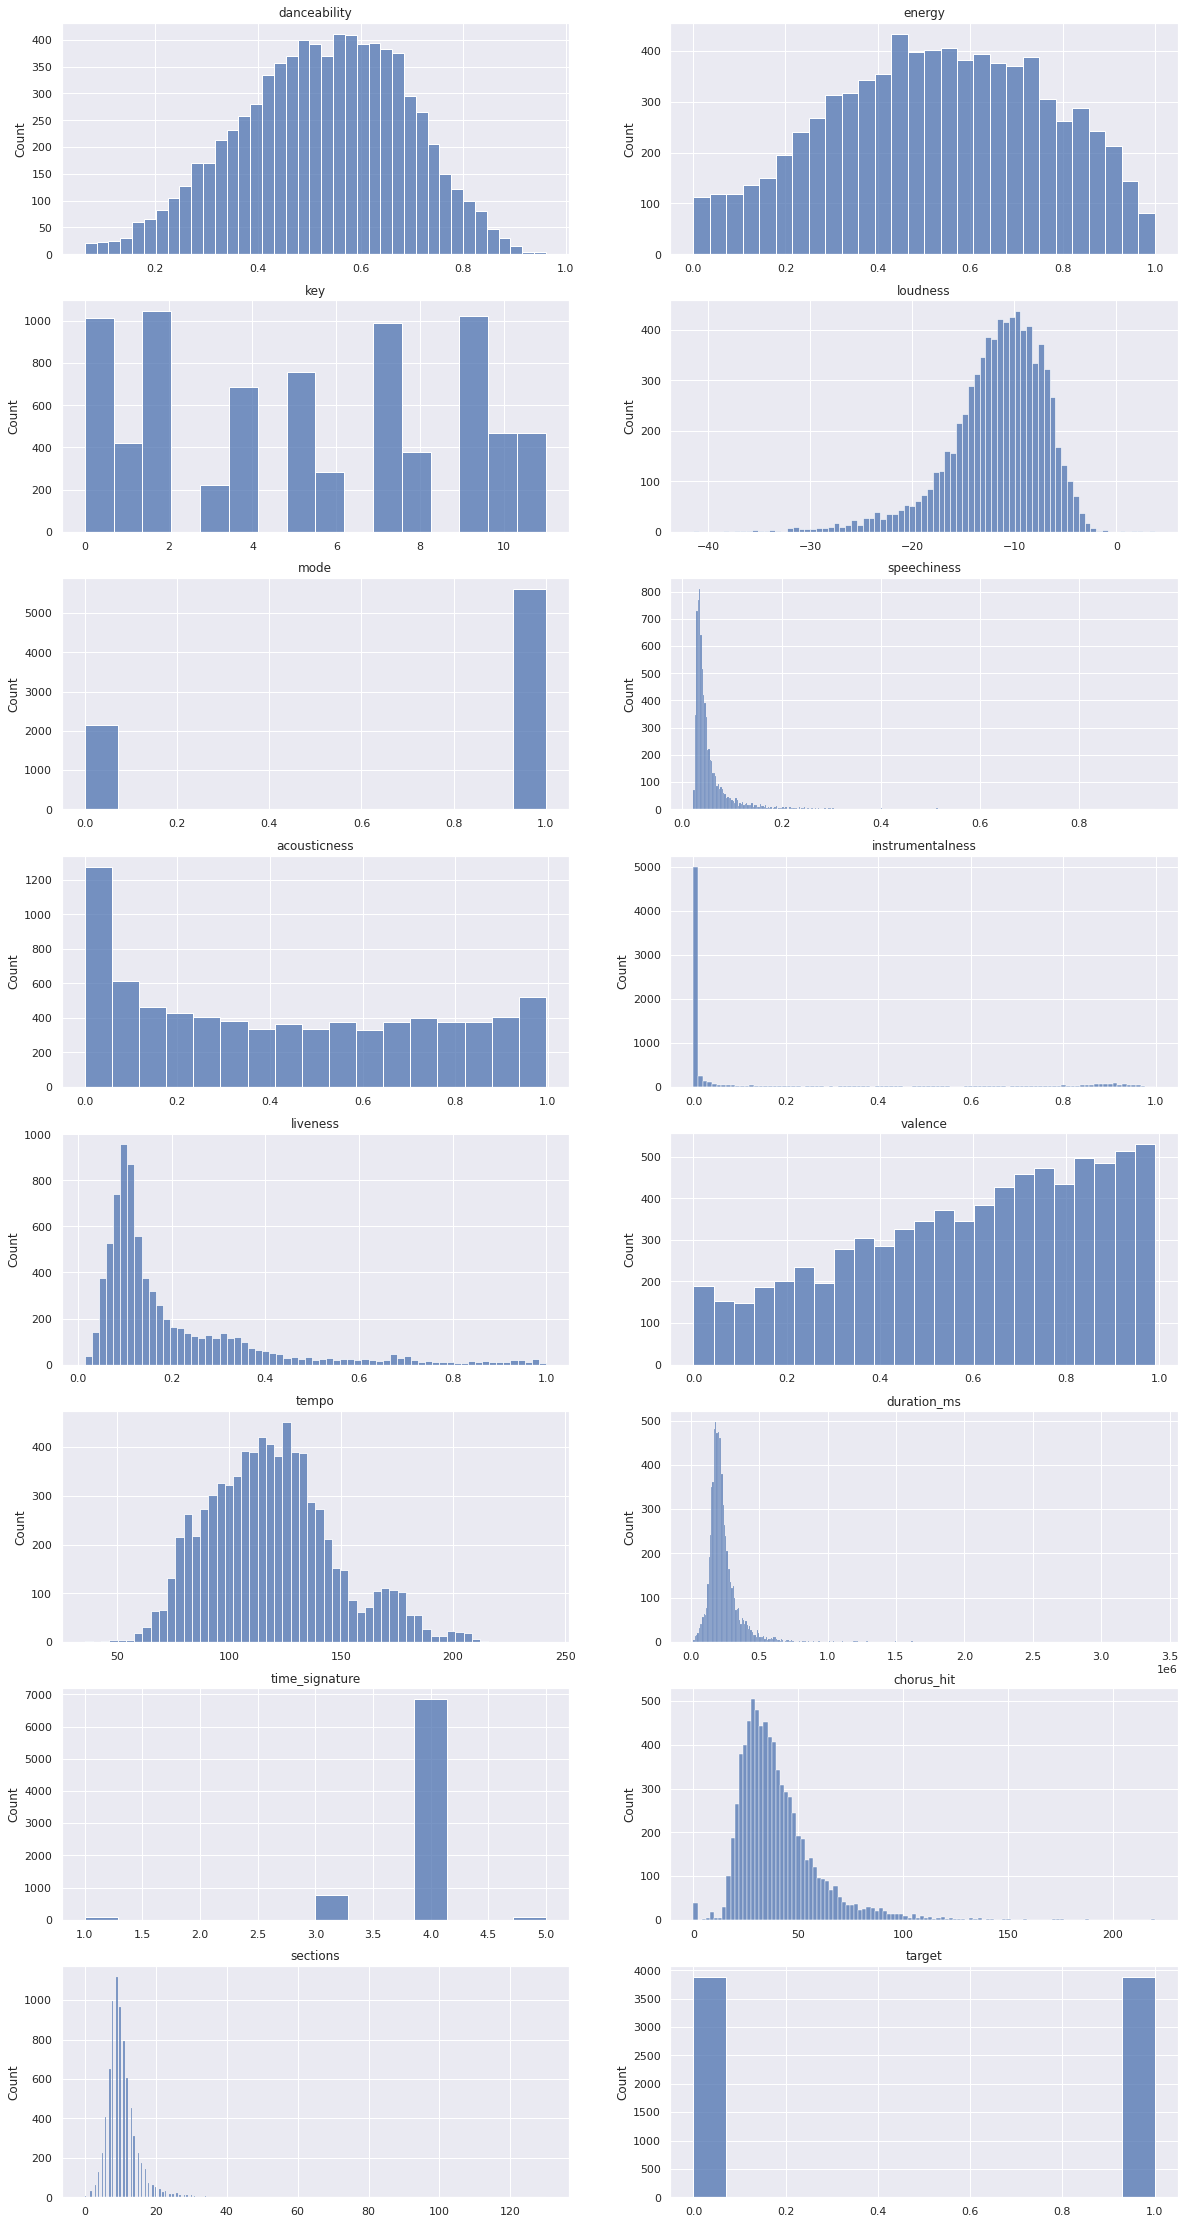


dataset-of-80s
----------------------------------------------



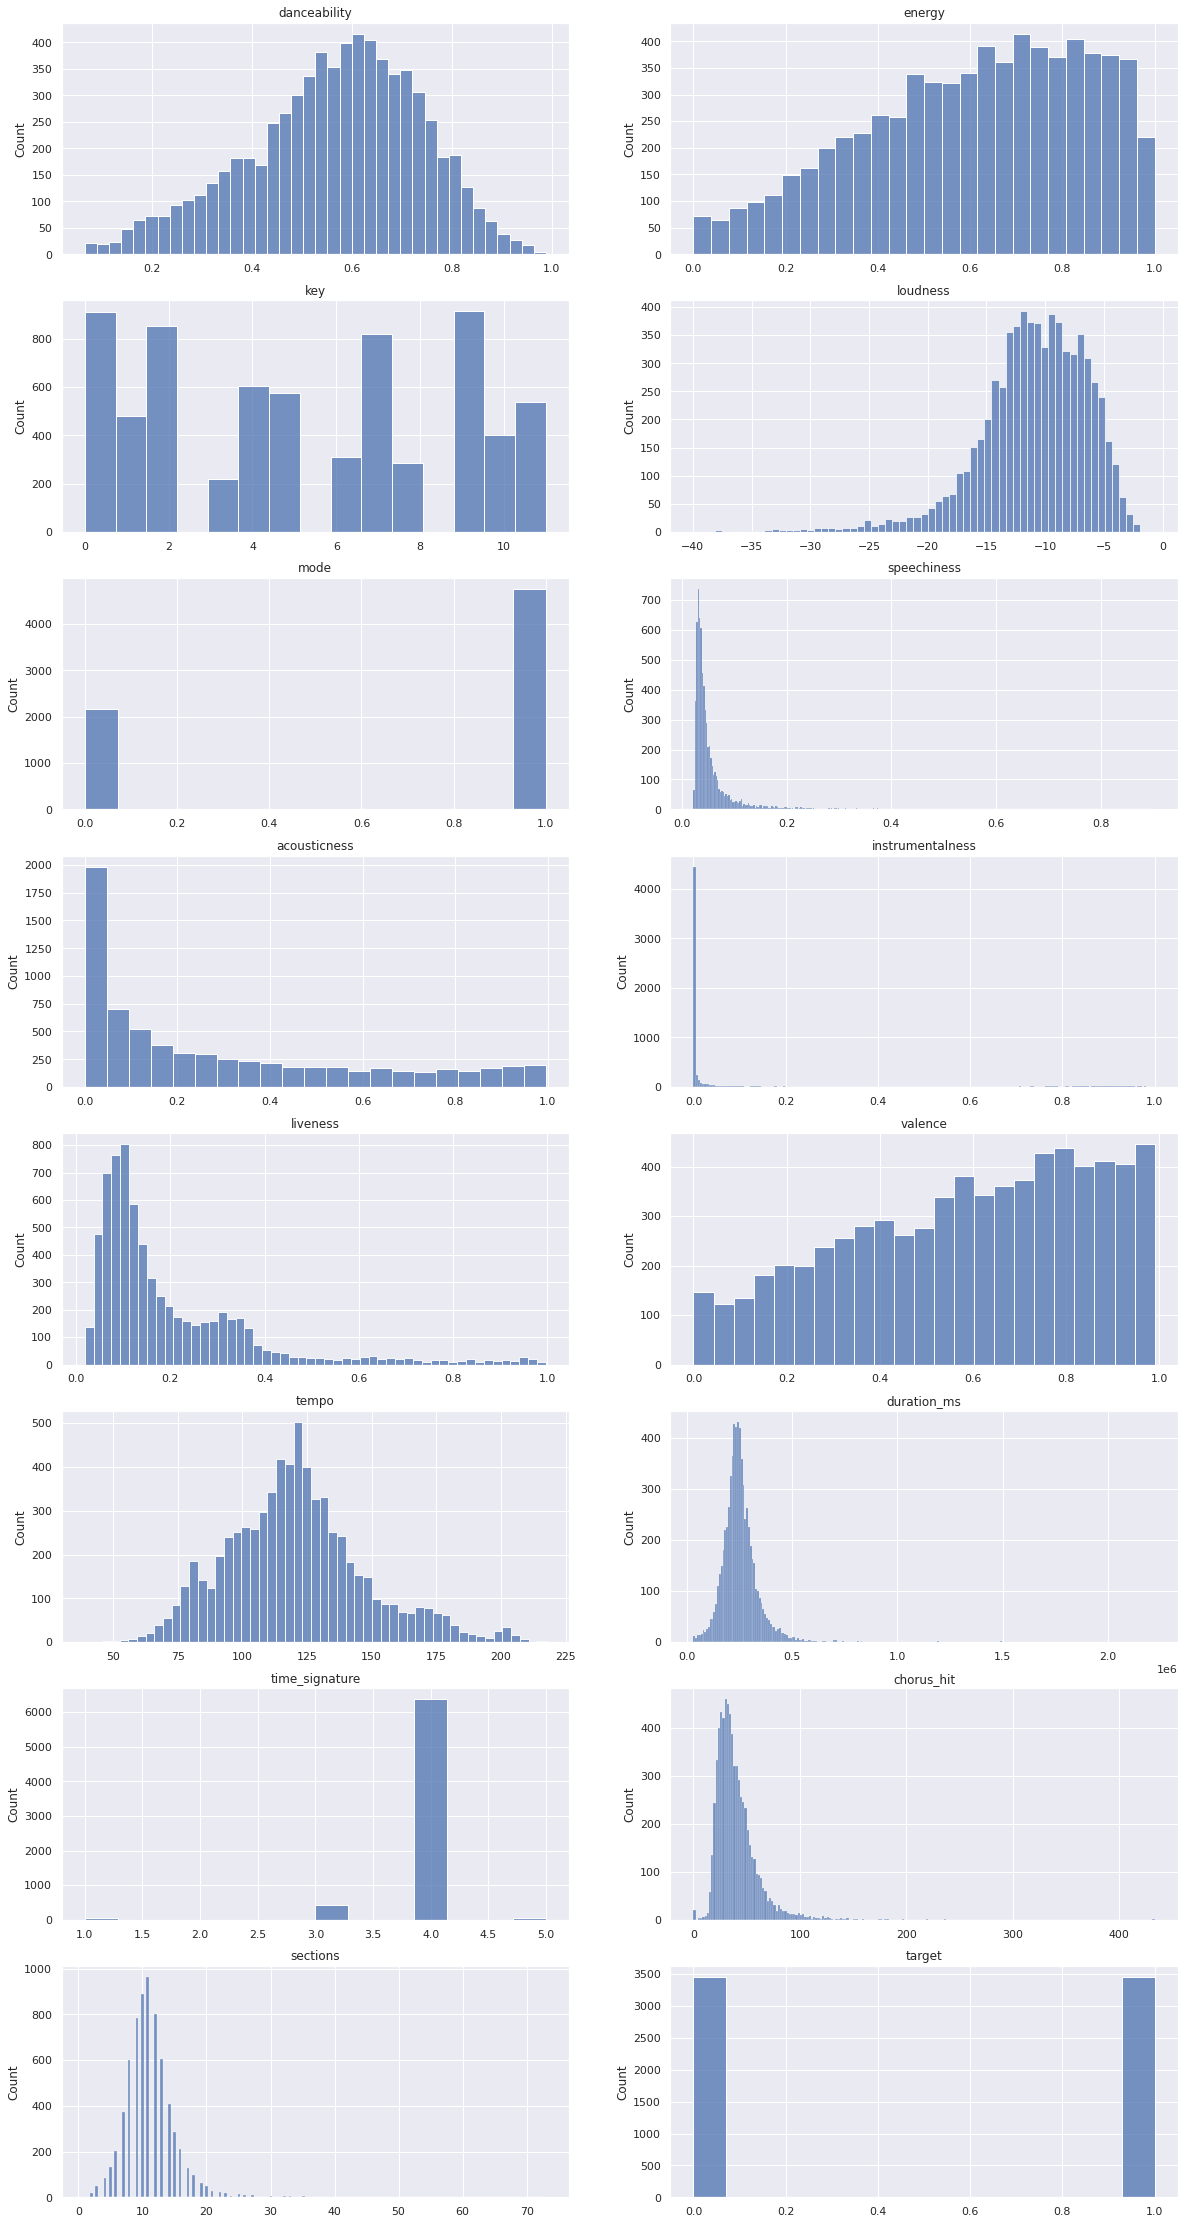


dataset-of-90s
----------------------------------------------



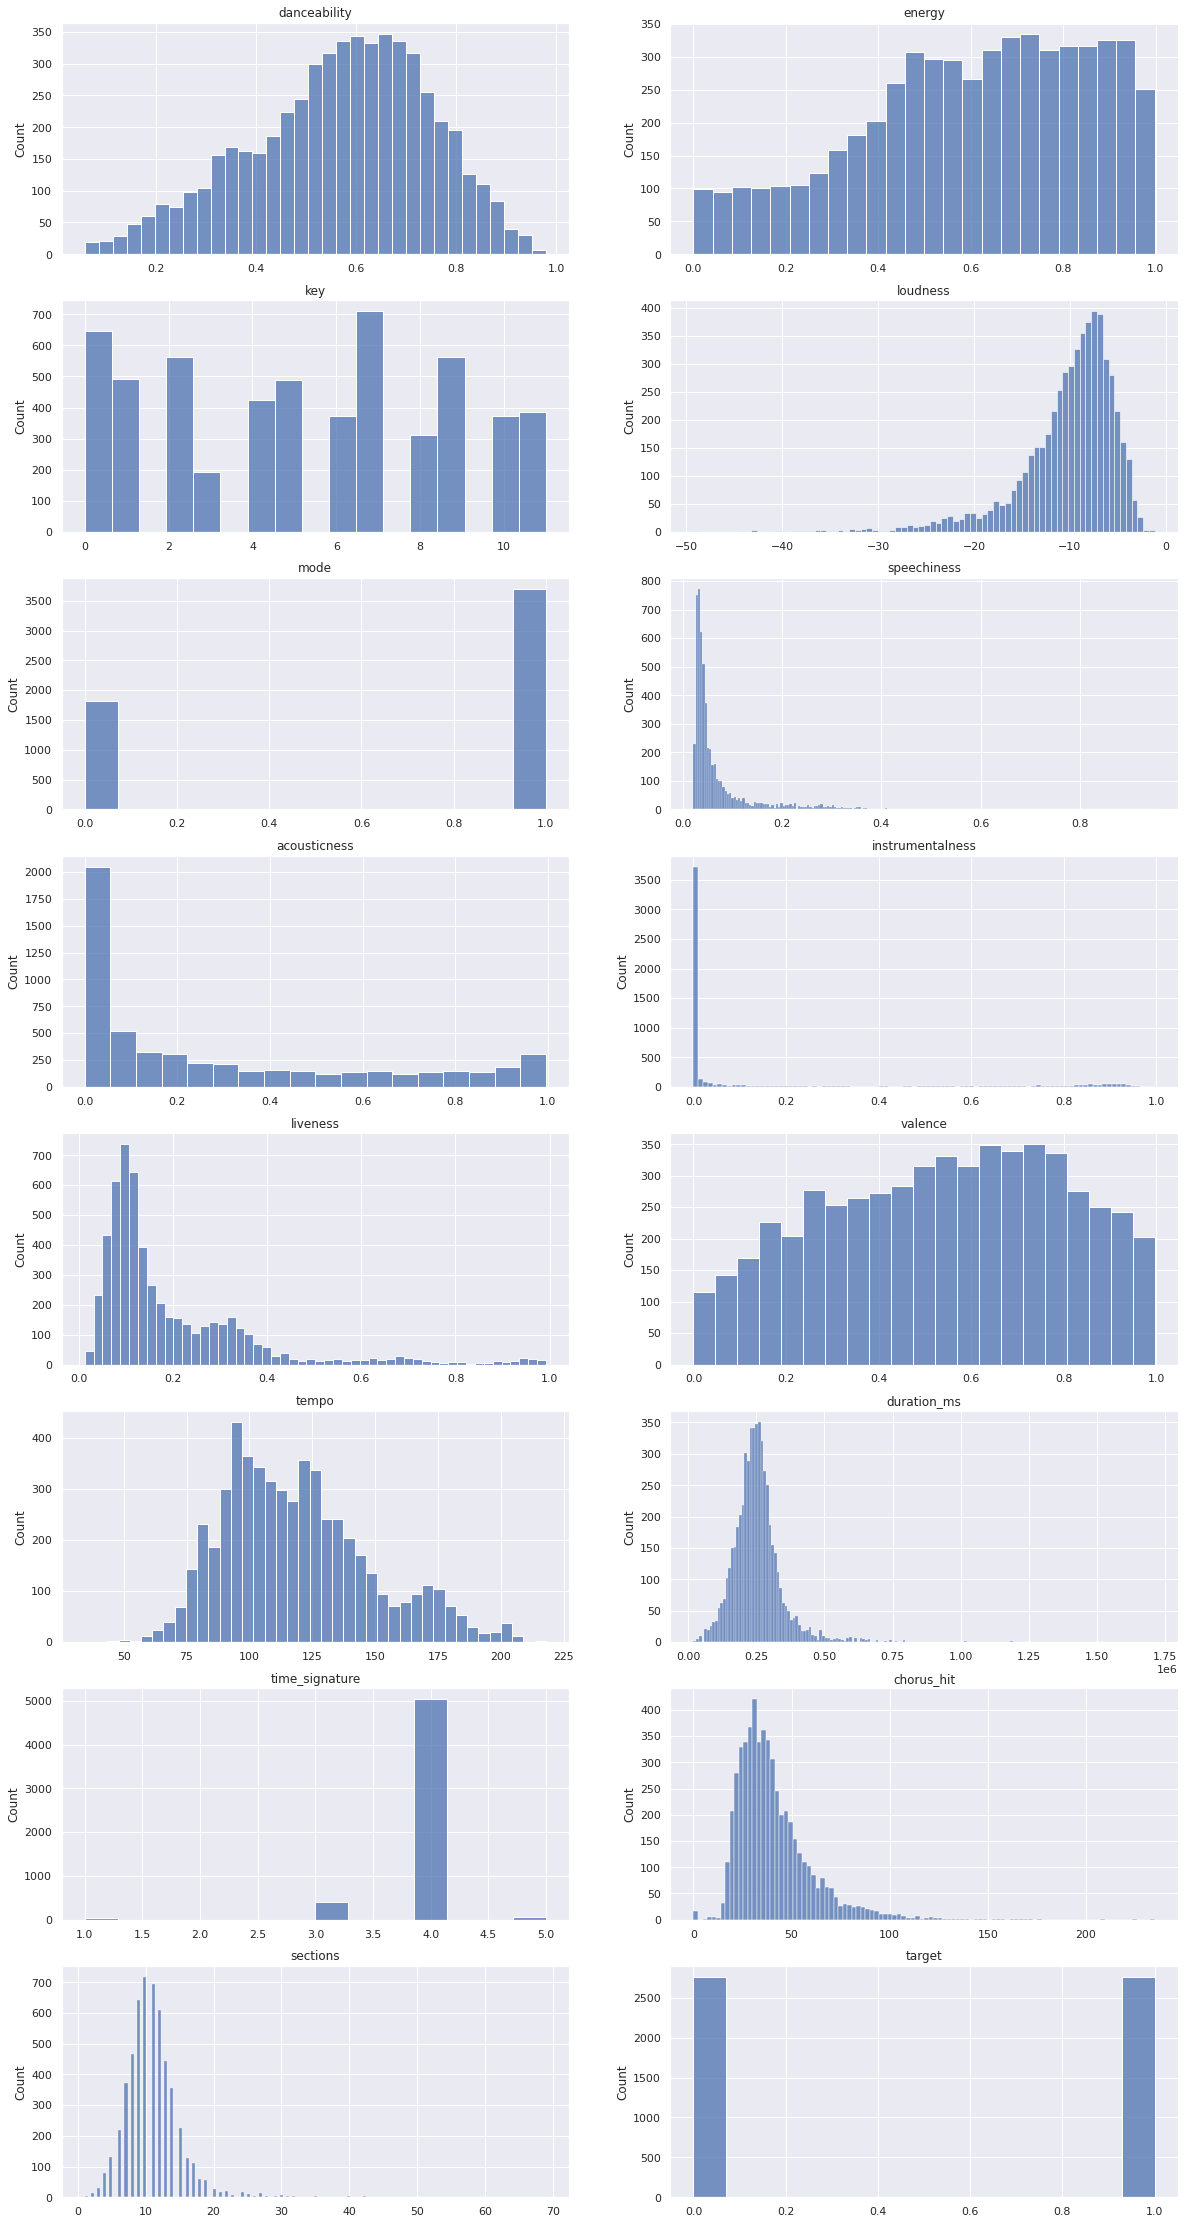

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

<Figure size 1440x2880 with 0 Axes>

In [ ]:
for key, df in df_dict_clean.items():
  n_rows = 8
  n_cols = 2

  sns.set()
  fig, axes = plt.subplots(n_rows, n_cols, figsize = (20, 40))

  for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax = axes[i//n_cols, i%n_cols])
    axes.flatten()[i].set_title(column)
    axes.flatten()[i].set_xlabel("")
  print("\n" + key + "\n----------------------------------------------\n")
  display.display(fig)
  fig.clf()
  



Distribution of most variables are not normal, but no extraordinary bad disributions. The target variable is almost equal for hit and fail. There are no extreme outliers. In conclusion, data seems acceptable for modelling.
### Creating correlation matrix to examine the variables



dataset-of-00s
----------------------------------------------



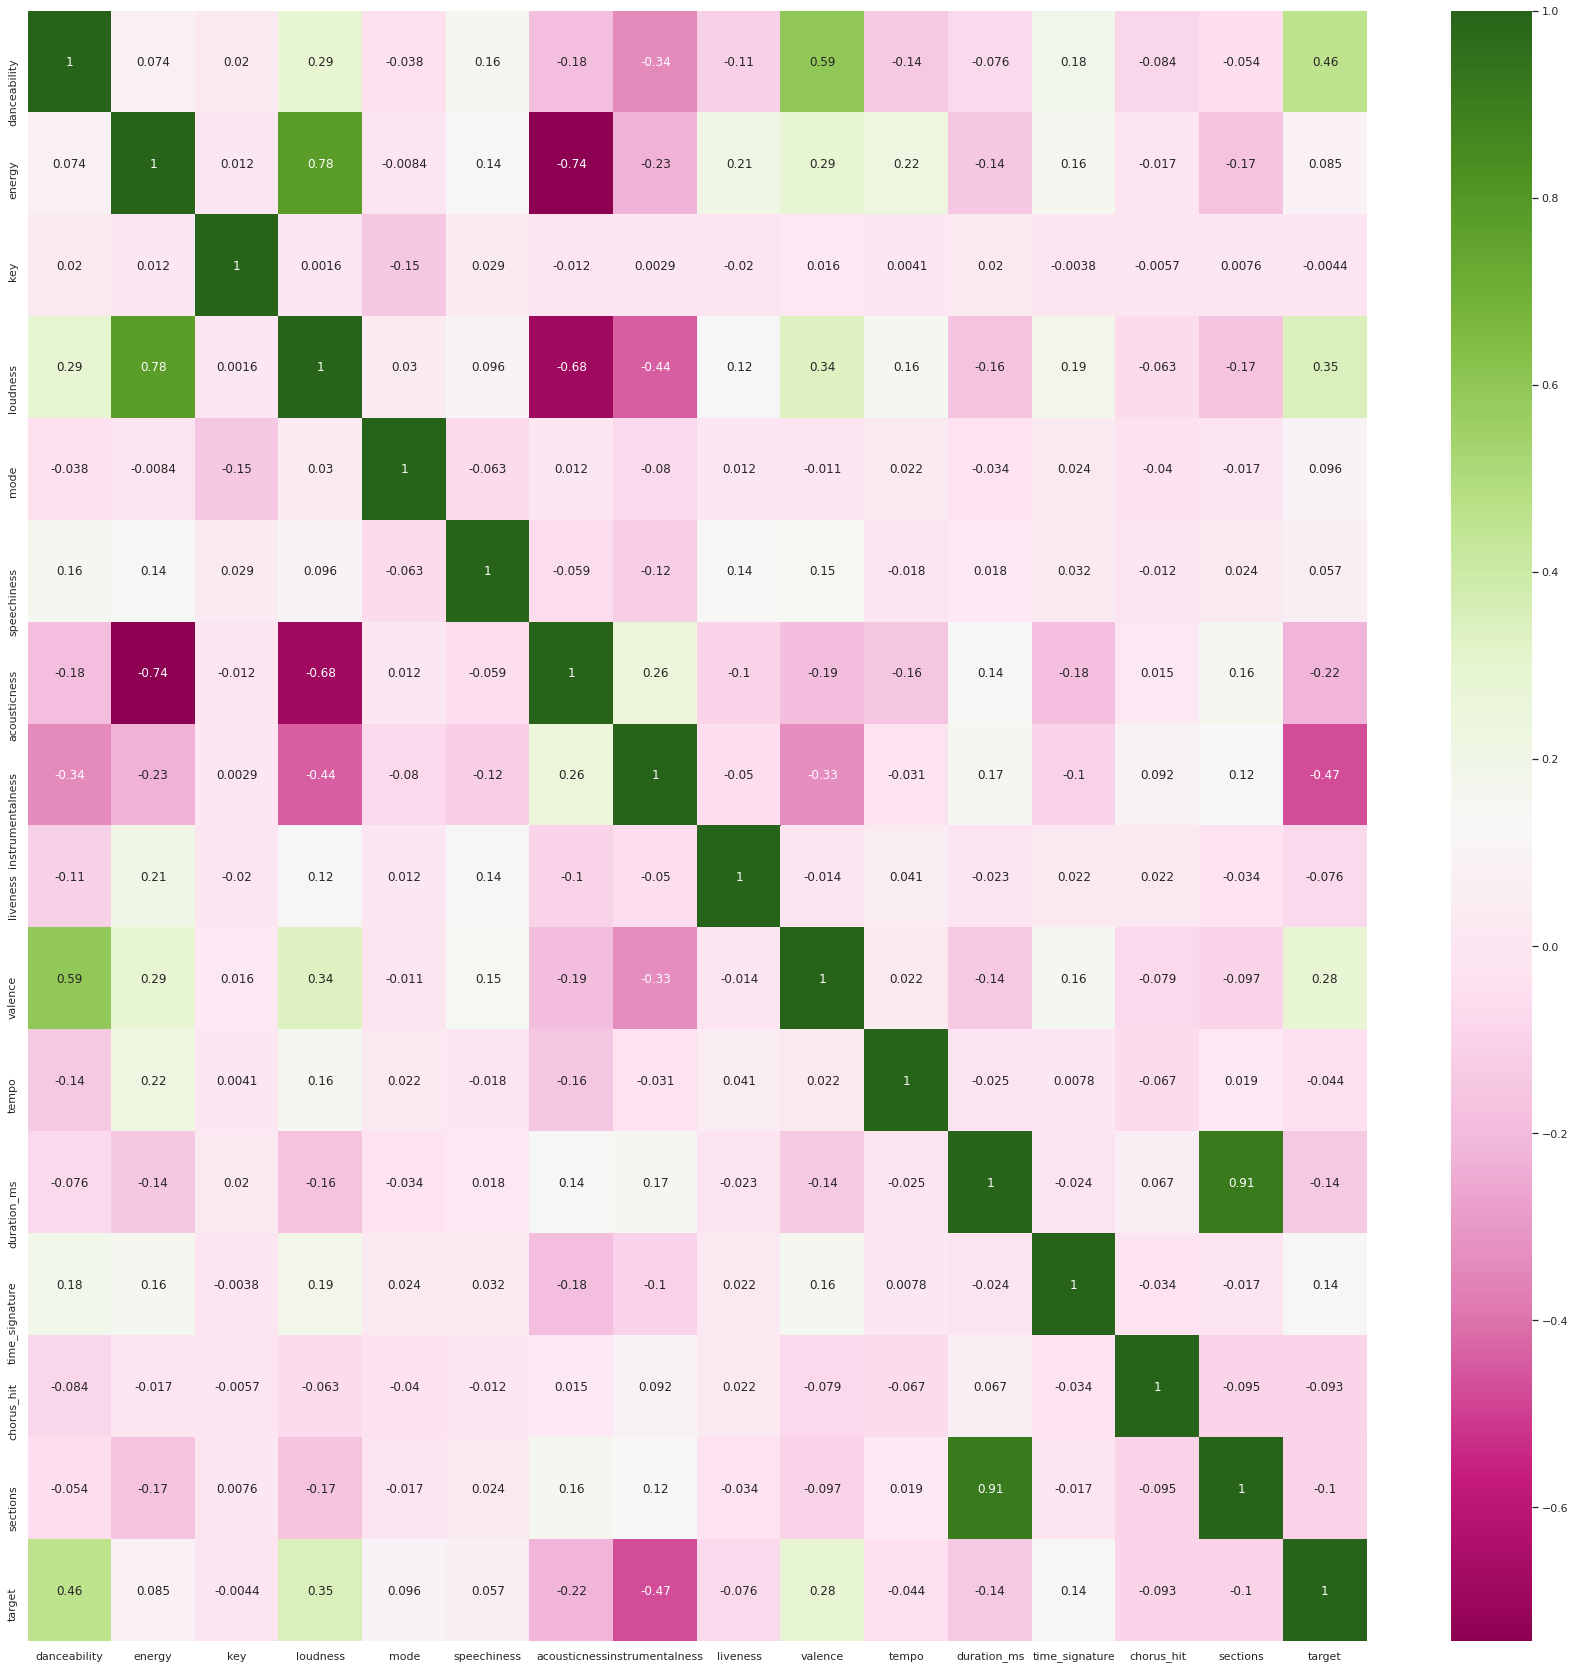


dataset-of-10s
----------------------------------------------



<Figure size 432x288 with 0 Axes>

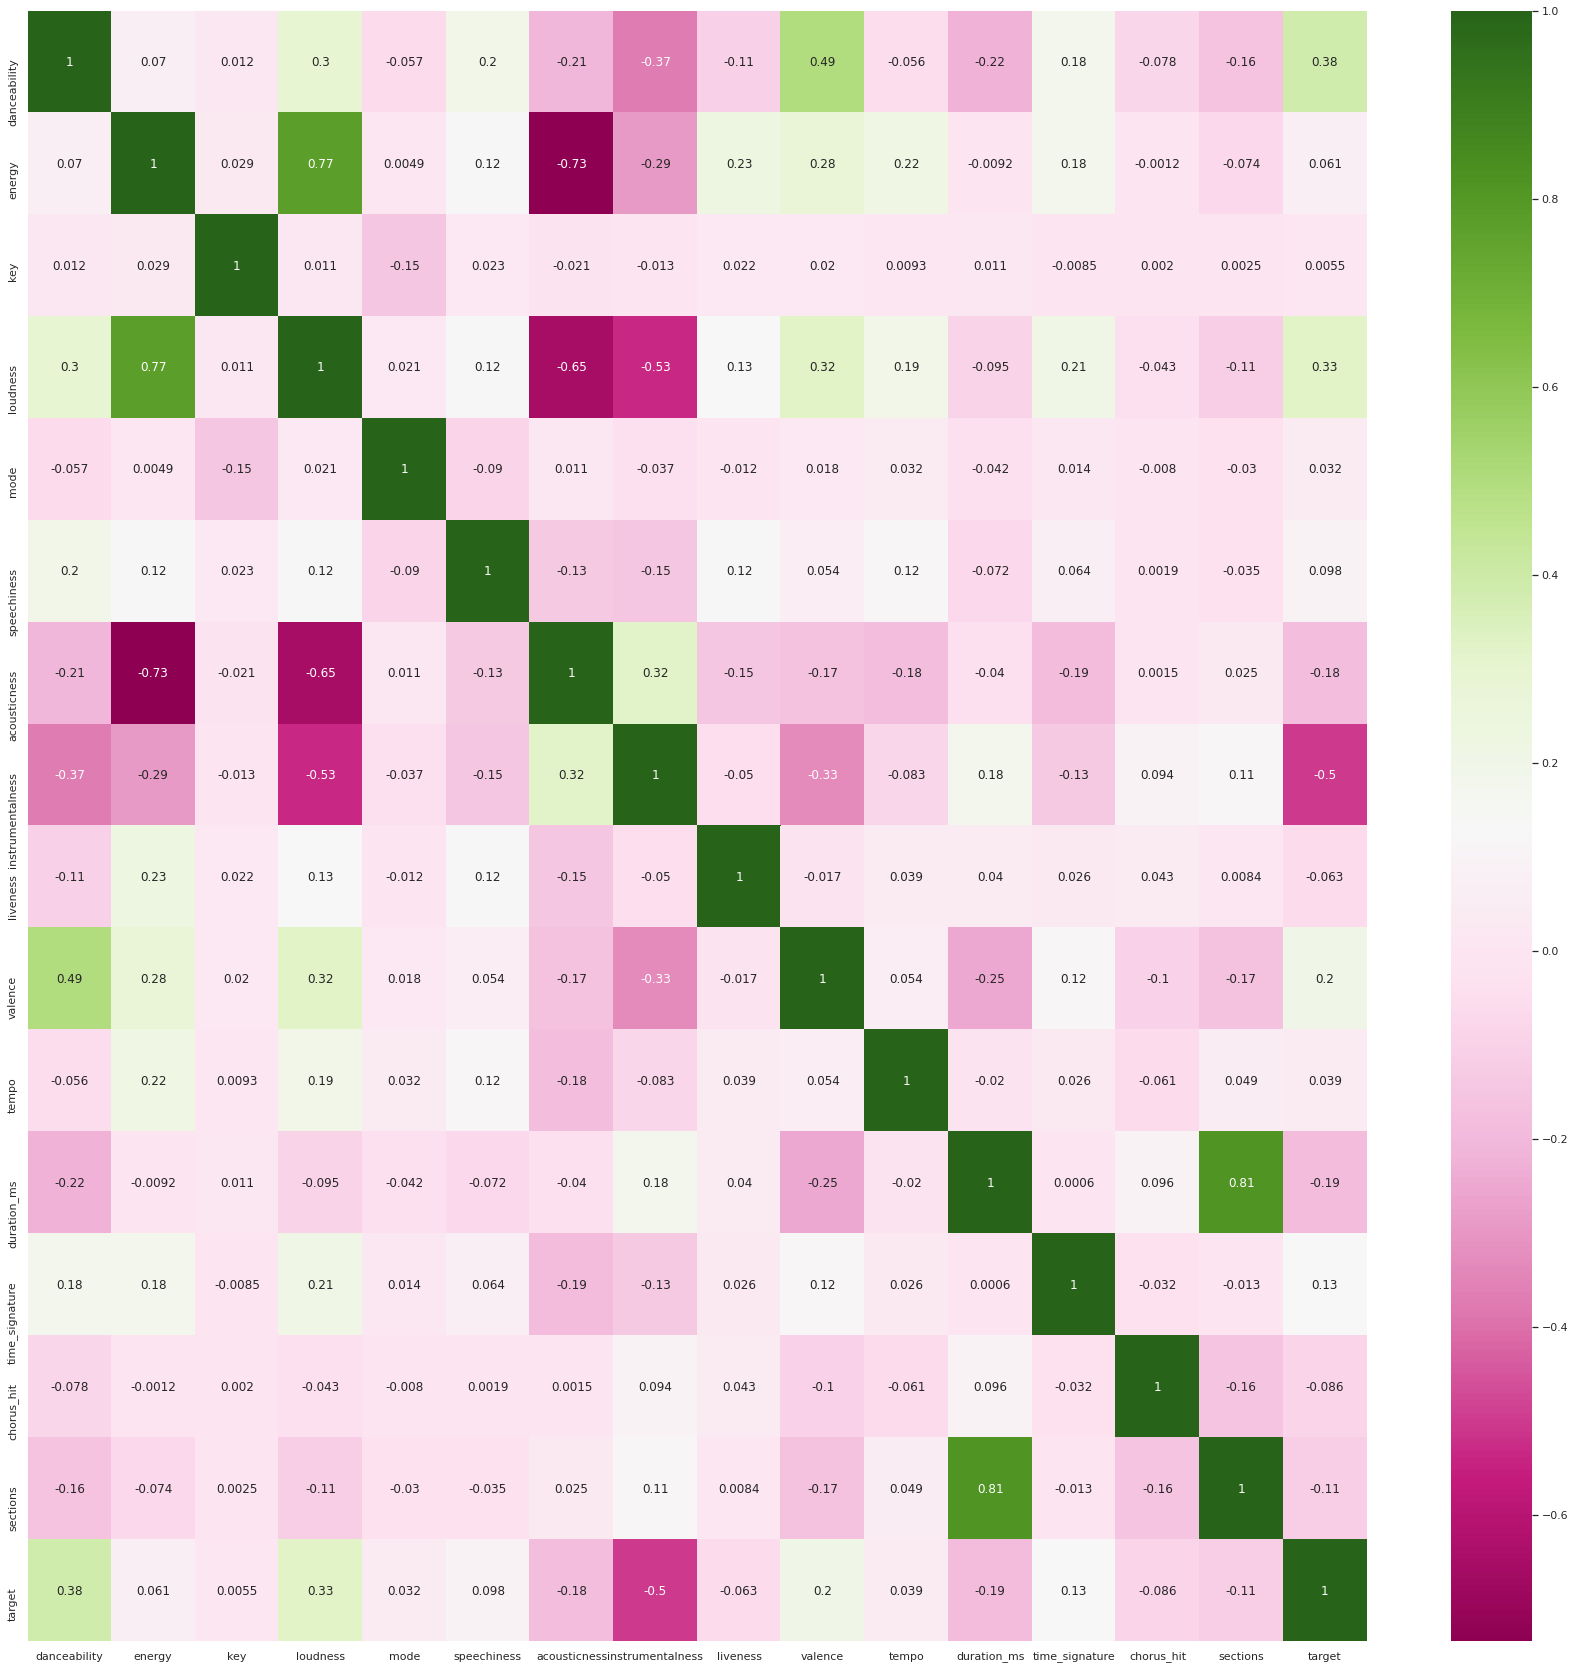


dataset-of-60s
----------------------------------------------



<Figure size 432x288 with 0 Axes>

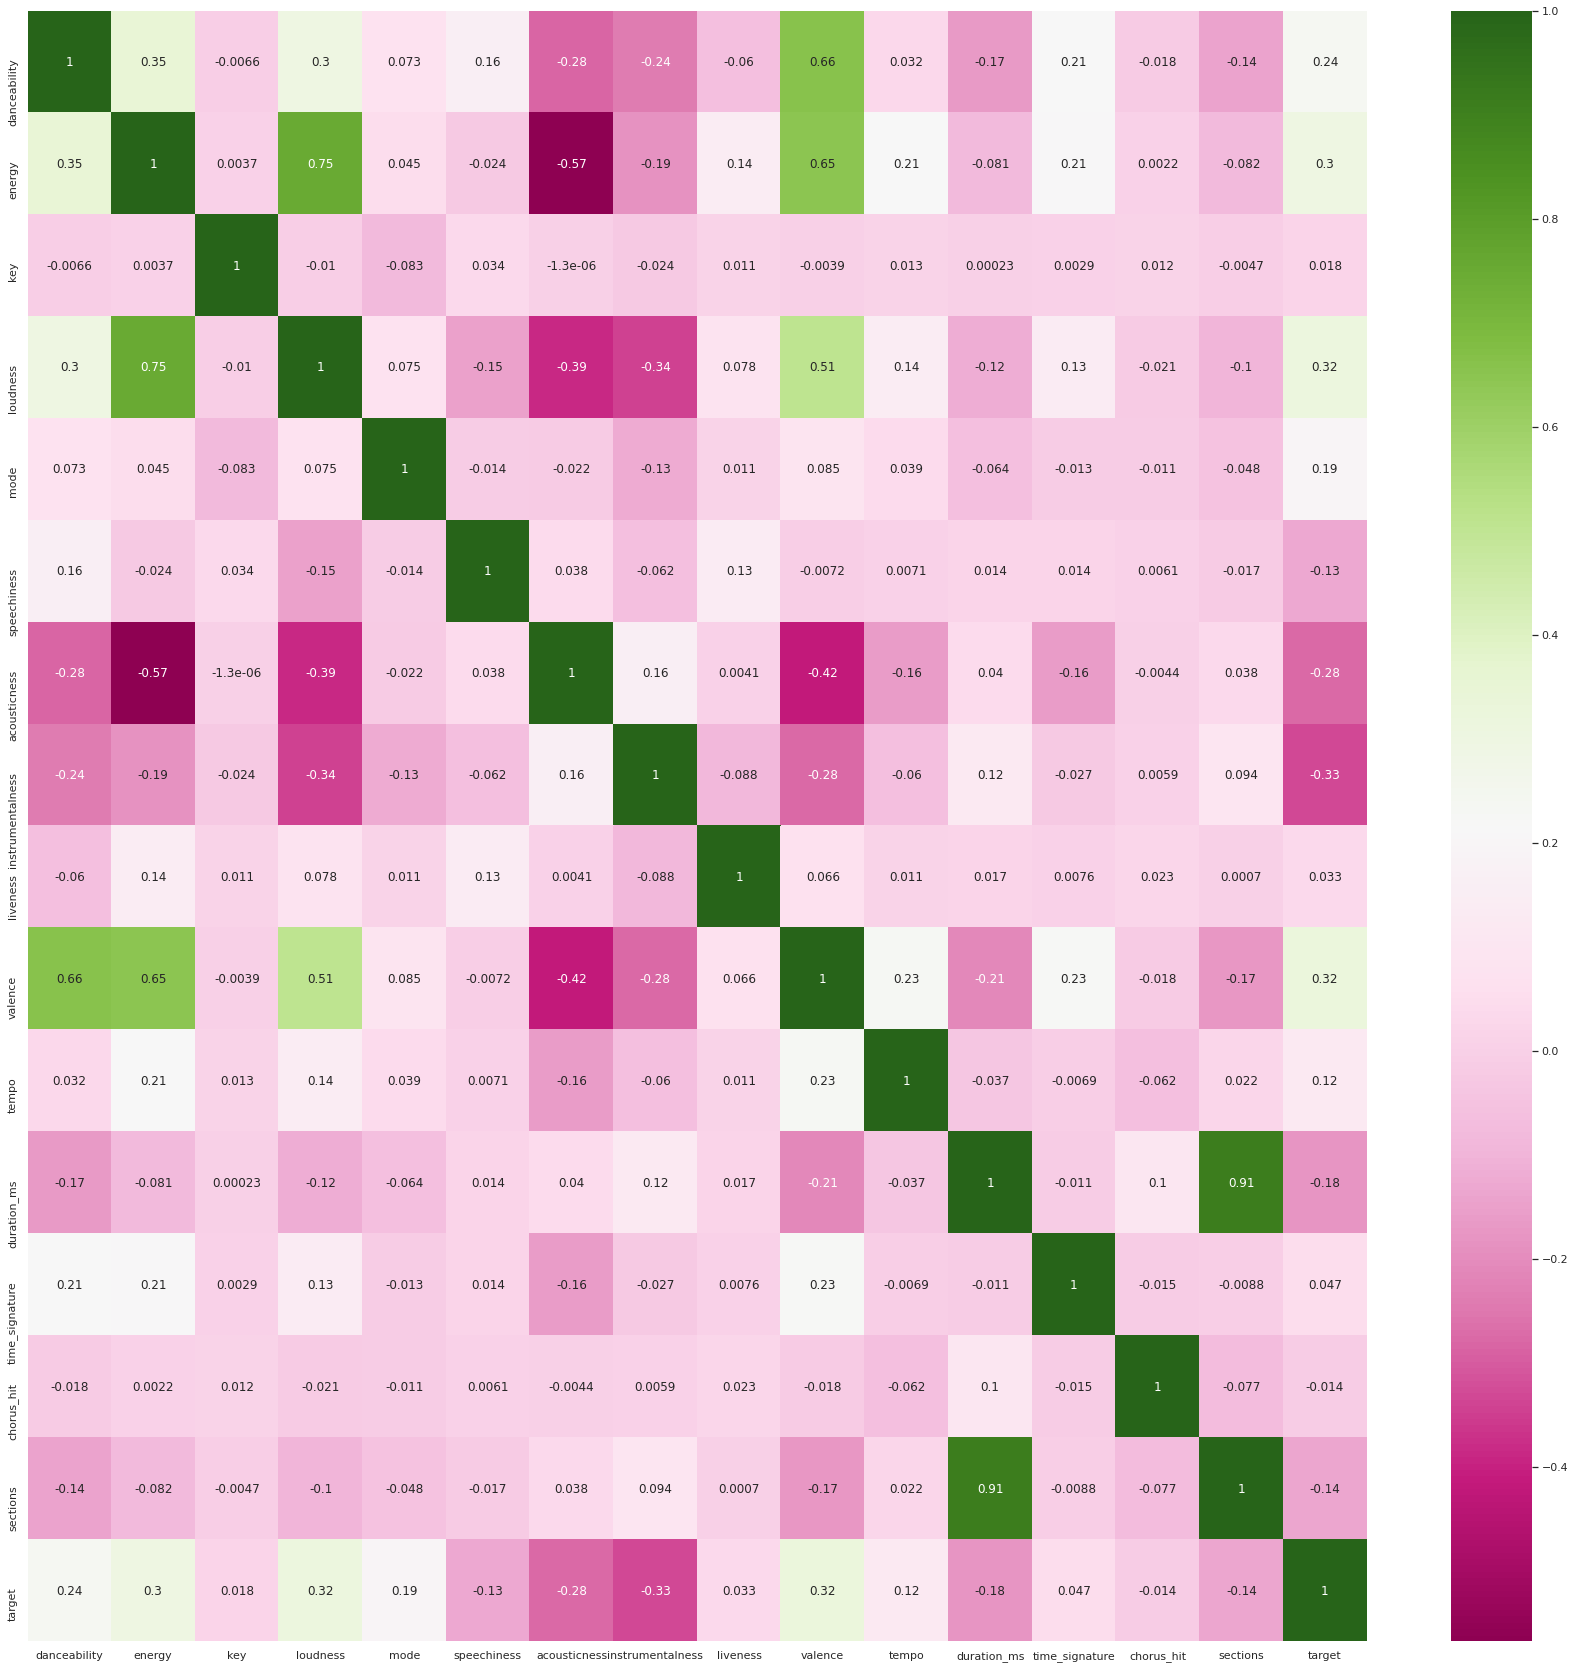


dataset-of-70s
----------------------------------------------



<Figure size 432x288 with 0 Axes>

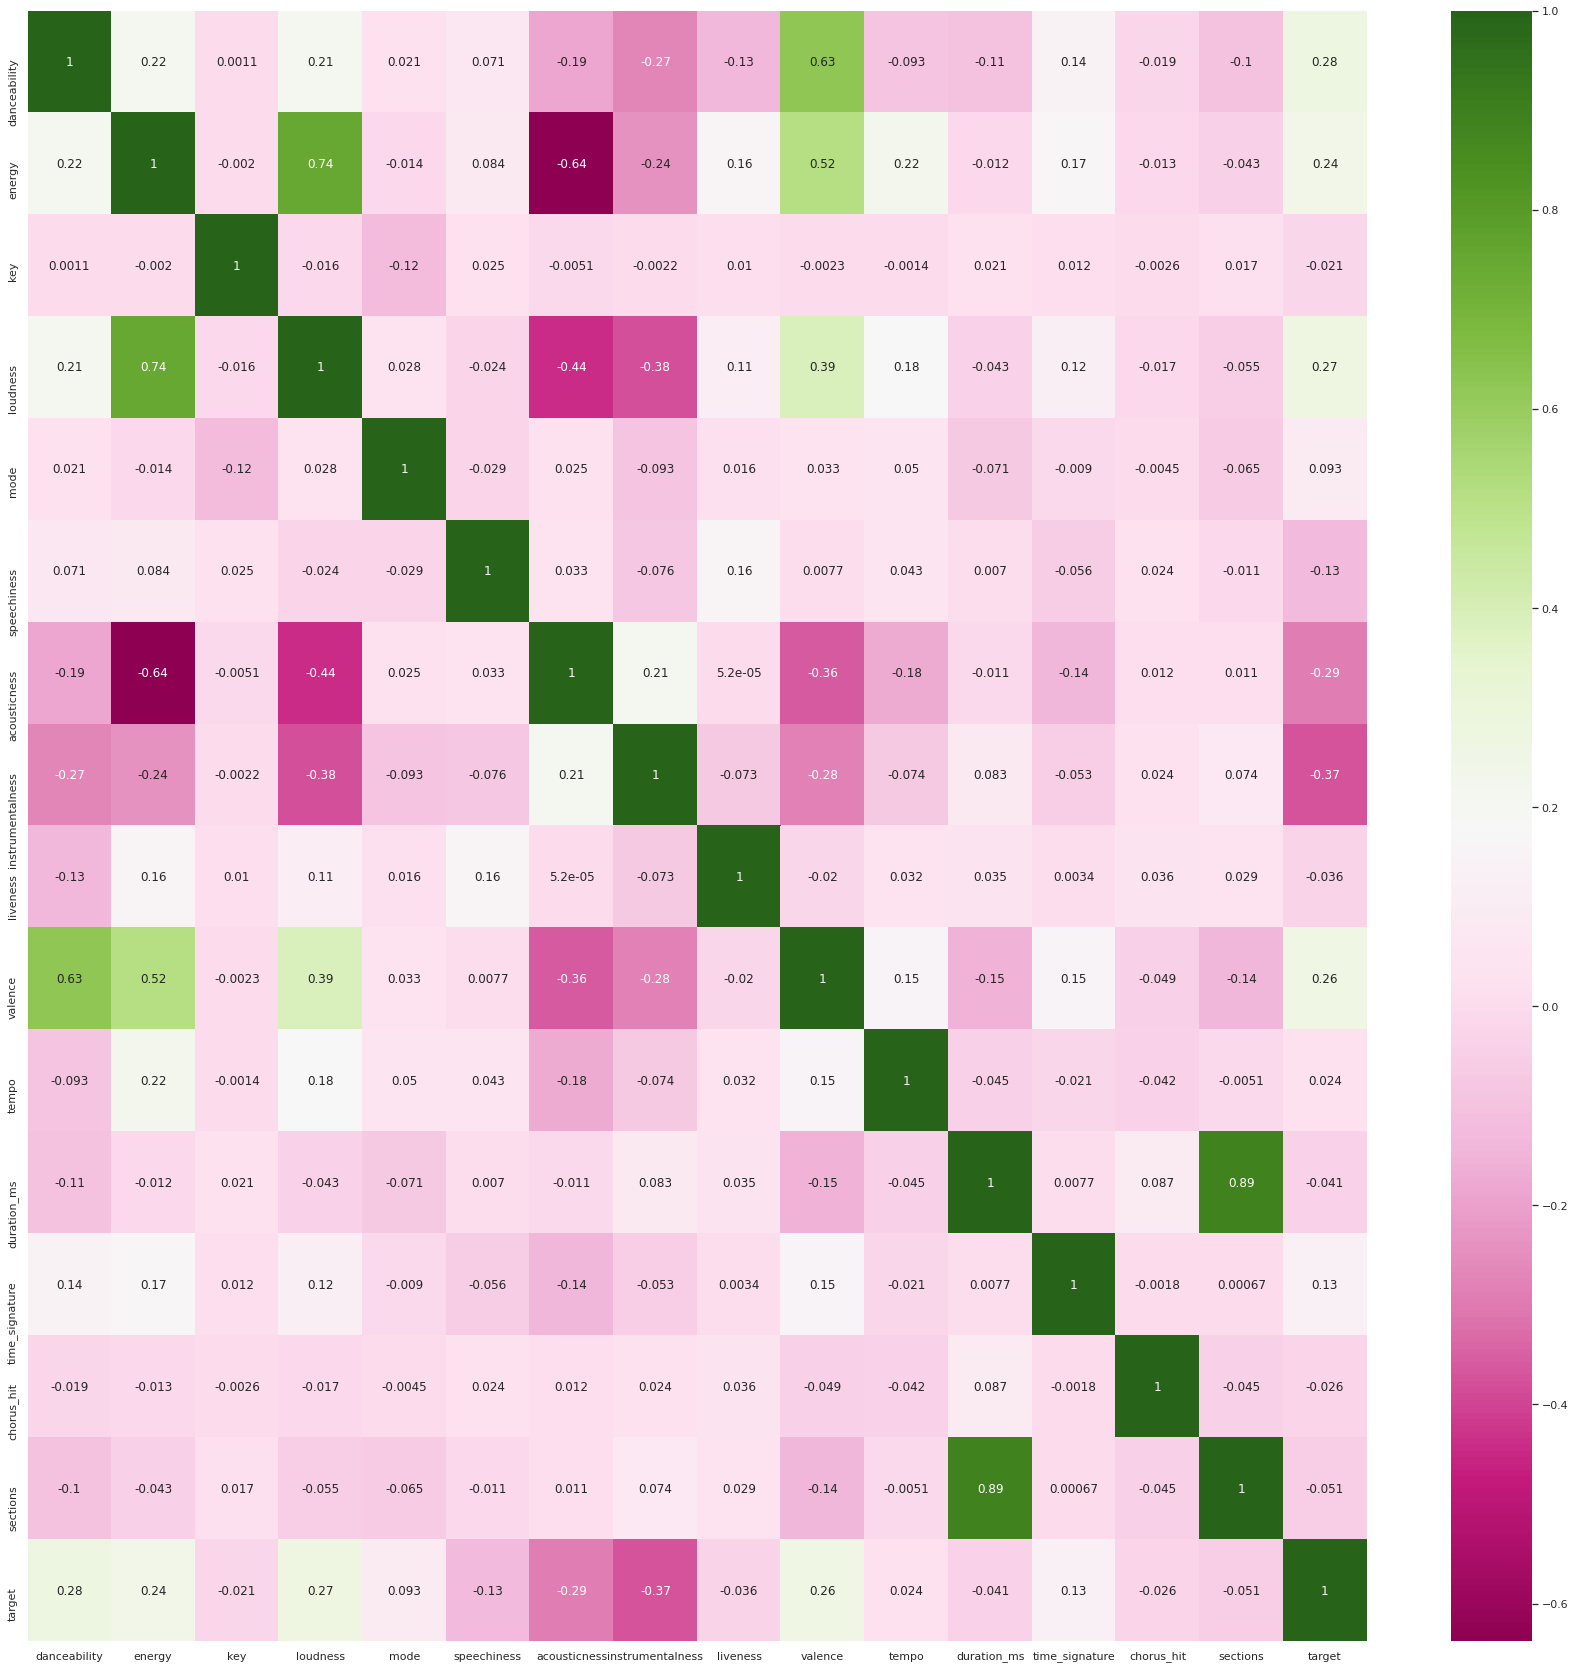


dataset-of-80s
----------------------------------------------



<Figure size 432x288 with 0 Axes>

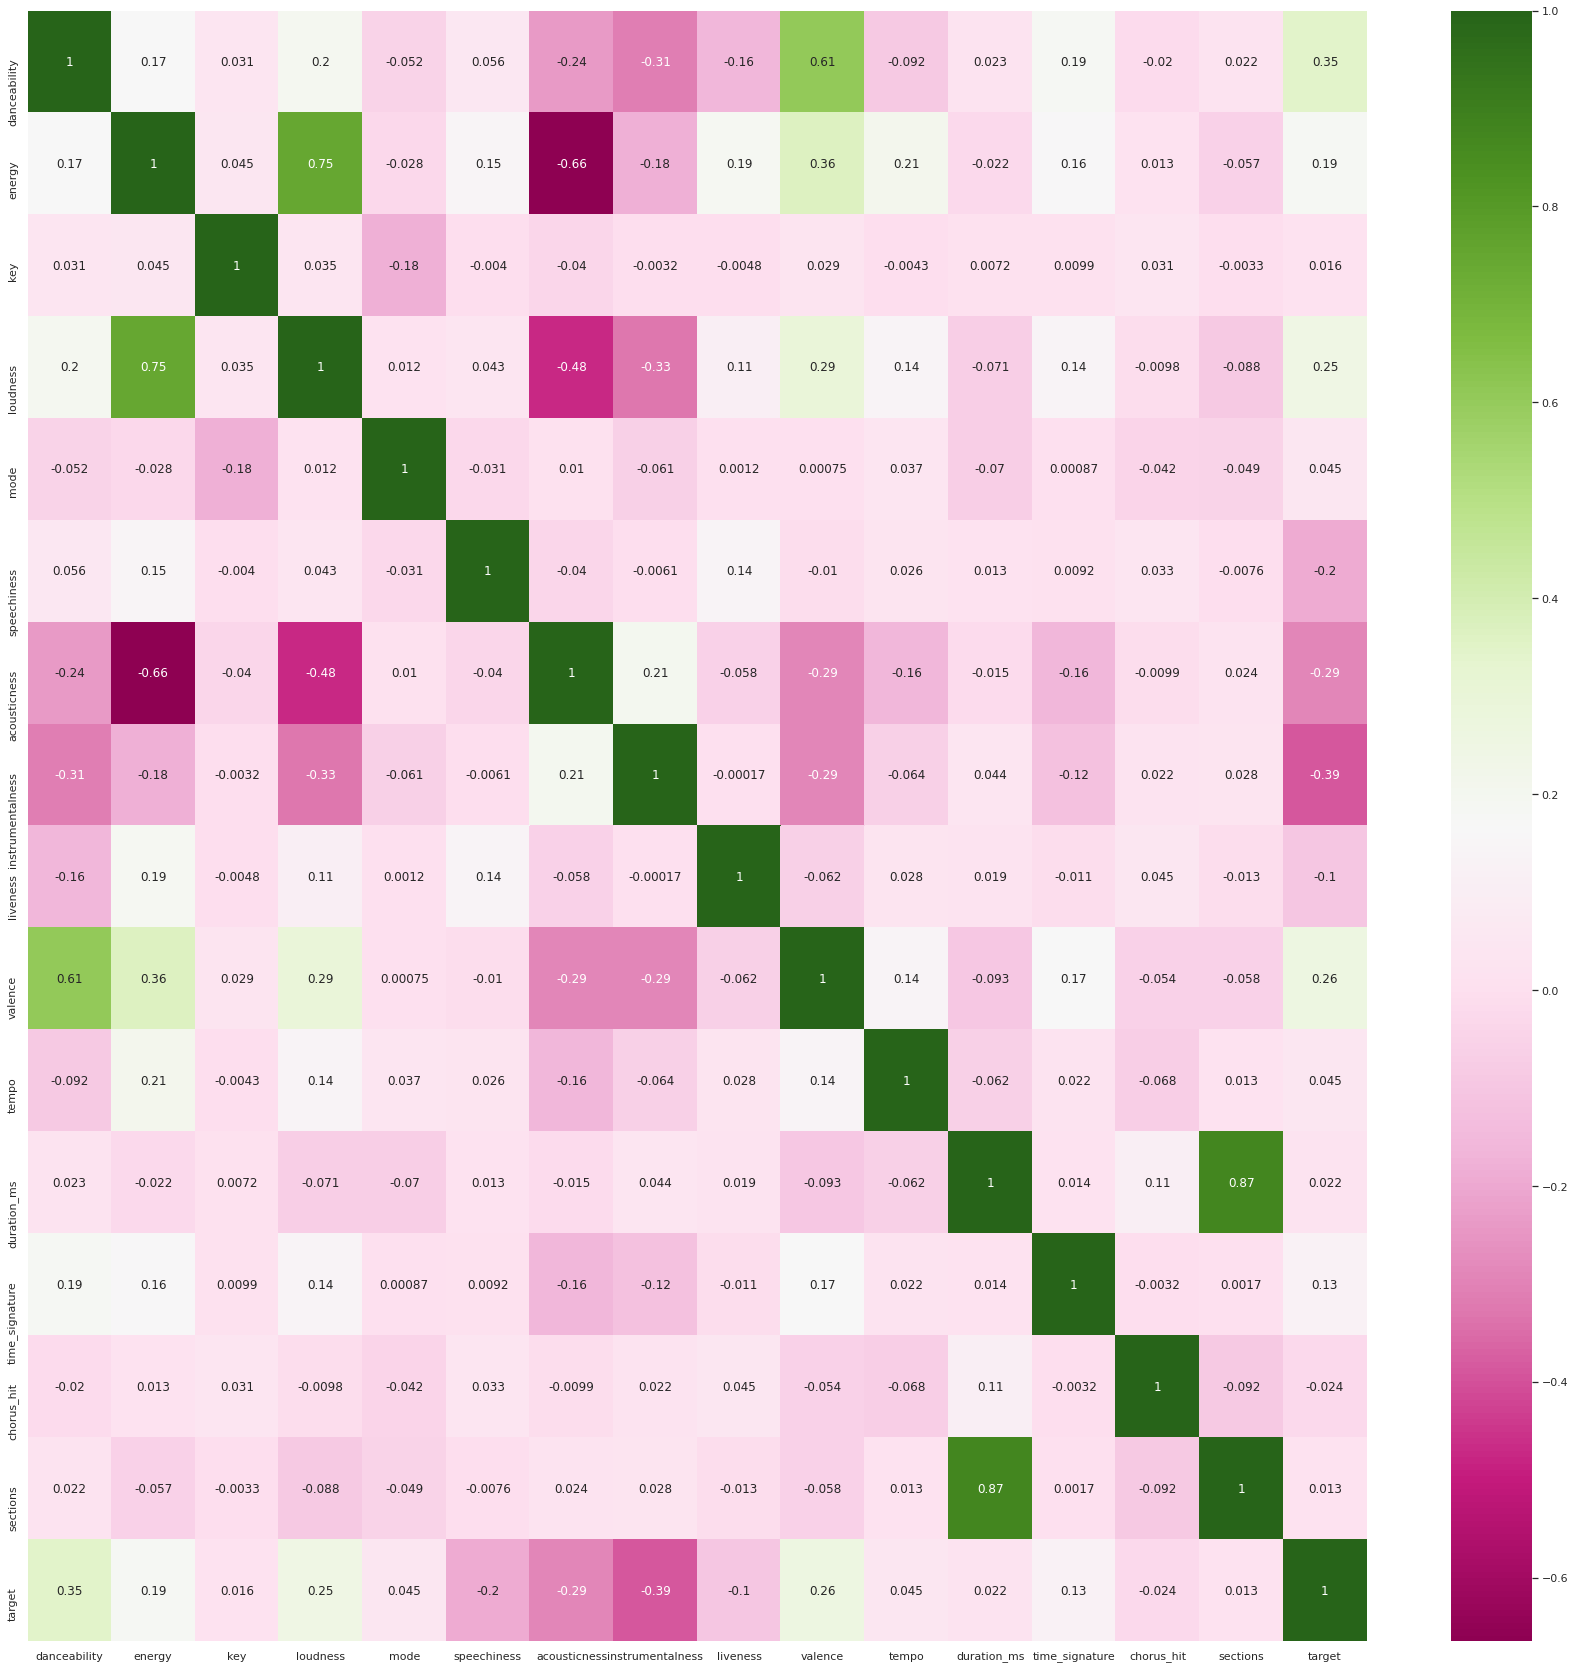


dataset-of-90s
----------------------------------------------



<Figure size 432x288 with 0 Axes>

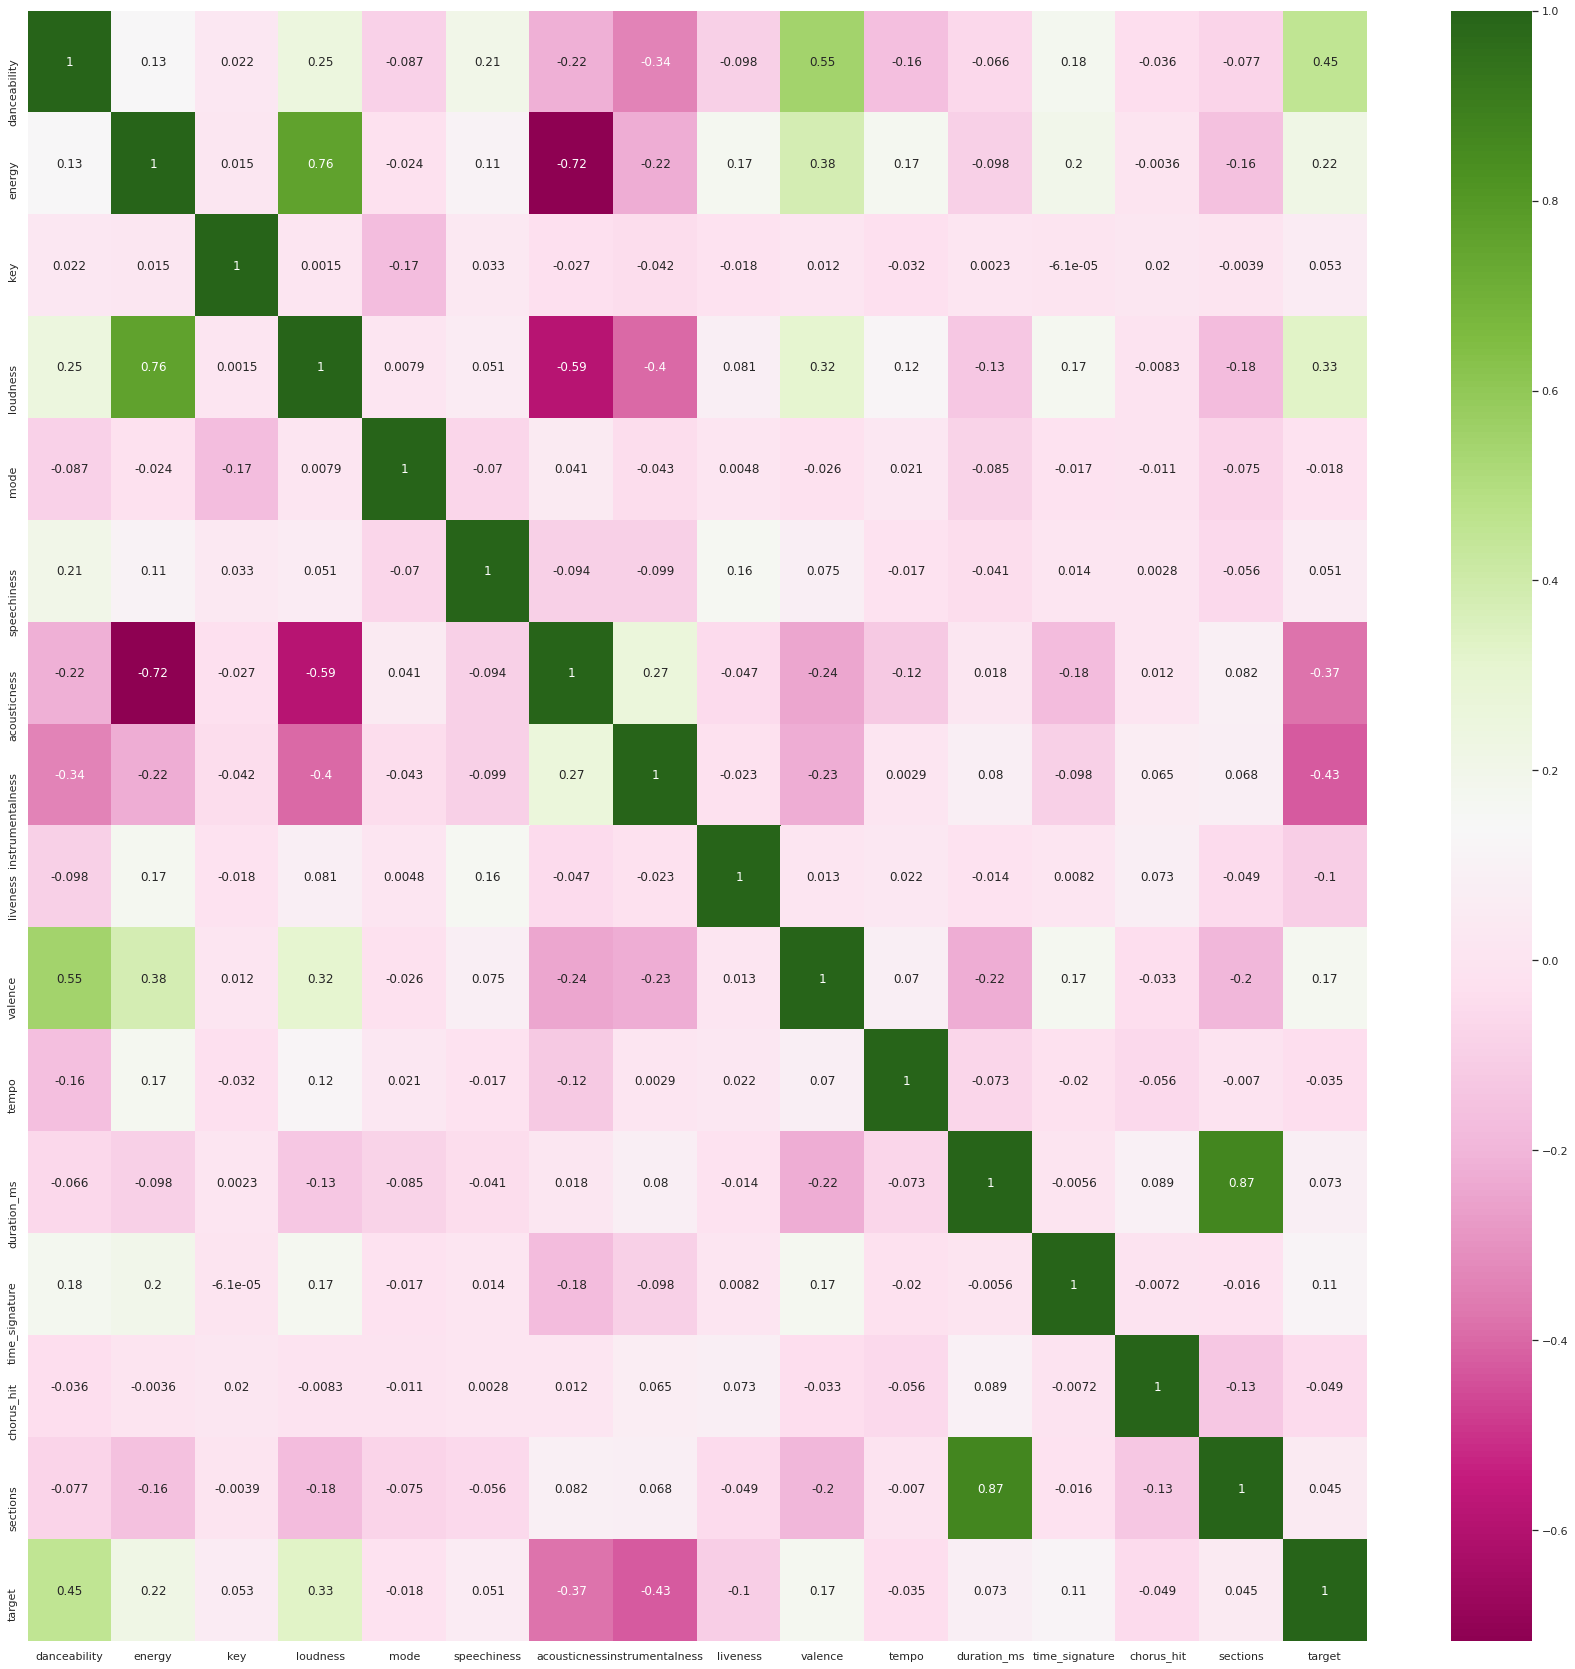

<Figure size 432x288 with 0 Axes>

In [ ]:
for key, df in df_dict_clean.items():

  corrMatrix = df.corr()
  plt.figure(figsize=(30,30))
  sns.heatmap(corrMatrix, annot=True, cmap="PiYG")
  
  print("\n" + key + "\n----------------------------------------------\n")
  plt.show()
  plt.clf()

The correlation matrices do not change too much over the examined period, there are some strongly correlated variables but not too much. The target variable has no strong correlation with any of the other variables --> calls for using all the variables in the initial modell.

## Building random forest models for each decade

### Dataset of 60's

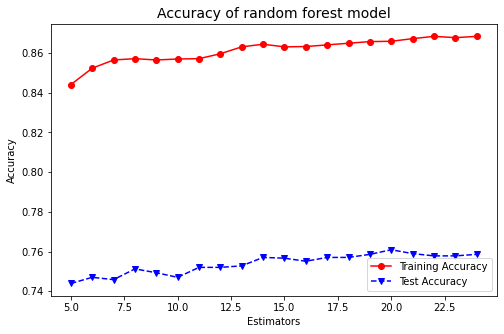

In [7]:
# Separating target variable
df = df_dict_clean['dataset-of-60s']
X = df.drop("target", axis = 1)
y = df['target'].array

# Creating train,test split
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X, y, test_size = 0.3, random_state = 10)

# running multiple random forest models to define optimal estimator
random_forest_estimator(X_train_60, y_train_60, X_test_60, y_test_60, max_depth=10)

According to the plot 13 is the optimal estimator. 

In [14]:
clf_60 = RandomForestClassifier(n_estimators = 13, random_state = 10, max_depth = 10)
clf_60.fit(X_train_60, y_train_60)
y_pred_60 = clf_60.predict(X_test_60)

check_accuracy(y_test_60, y_pred_60)

Confusion matrix:
[[ 876  420]
 [ 201 1096]]

The accuracy score is 0.7605


### Dataset of 70's

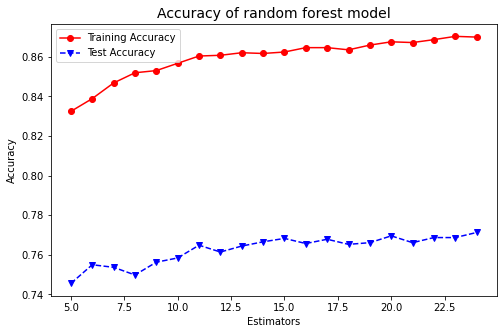

In [7]:
# Separating target variable
df = df_dict_clean['dataset-of-70s']
X = df.drop("target", axis = 1)
y = df['target'].array

# Creating train,test split
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size = 0.3, random_state = 0)

# running multiple random forest models to define optimal estimator
random_forest_estimator(X_train_70, y_train_70, X_test_70, y_test_70, max_depth=10)

According to the plot 15 is the optimal estimator. 

In [ ]:
clf_70 = RandomForestClassifier(n_estimators = 15, random_state = 0, max_depth = 10)
clf_70.fit(X_train_70, y_train_70)
y_pred_70 = clf_70.predict(X_test_70)

check_accuracy(y_test_70, y_pred_70)

Confusion Matrix 
 [[812 345]
 [195 978]] 

Accuracy Score 
 0.7682 



### Dataset of 80's

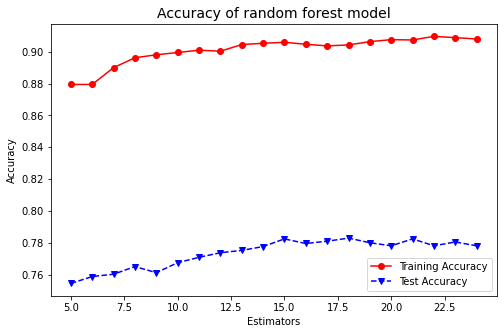

In [8]:
# Separating target variable
df = df_dict_clean['dataset-of-80s']
X = df.drop("target", axis = 1)
y = df['target'].array

# Creating train,test split
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size = 0.3, random_state = 0)

# running multiple random forest models to define optimal estimator
random_forest_estimator(X_train_80, y_train_80, X_test_80, y_test_80, max_depth=10)

According to the plot 15 is the optimal estimator.

In [16]:
clf_80 = RandomForestClassifier(n_estimators = 15, random_state = 0, max_depth = 10)
clf_80.fit(X_train_80, y_train_80)
y_pred_80 = clf_80.predict(X_test_80)

check_accuracy(y_test_80, y_pred_80)

Confusion Matrix 
 [[748 294]
 [157 874]] 

Accuracy Score 
 0.7824 



### Dataset of 90's

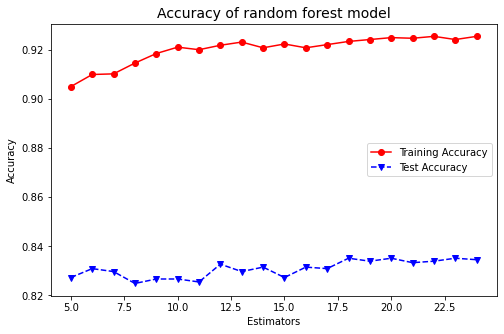

In [9]:
# Separating target variable
df = df_dict_clean['dataset-of-90s']
X = df.drop("target", axis = 1)
y = df['target'].array

# Creating train,test split
X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(X, y, test_size = 0.3, random_state = 0)

# running multiple random forest models to define optimal estimator
random_forest_estimator(X_train_90, y_train_90, X_test_90, y_test_90, max_depth=10)

According to the plot 12 is the optimal estimator.

In [18]:
clf_90 = RandomForestClassifier(n_estimators = 12, random_state = 0, max_depth = 10)
clf_90.fit(X_train_90, y_train_90)
y_pred_90 = clf_90.predict(X_test_90)

check_accuracy(y_test_90, y_pred_90)

Confusion Matrix 
 [[660 176]
 [101 719]] 

Accuracy Score 
 0.8327 



### Dataset of 00's

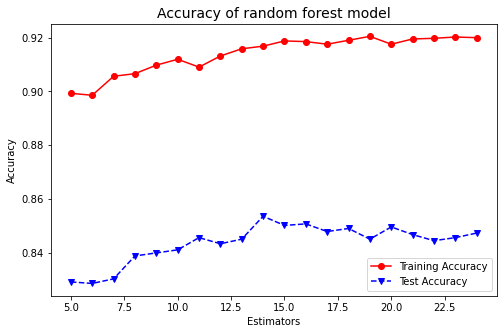

In [10]:
# Separating target variable
df = df_dict_clean['dataset-of-00s']
X = df.drop("target", axis = 1)
y = df['target'].array

# Creating train,test split
X_train_00, X_test_00, y_train_00, y_test_00 = train_test_split(X, y, test_size = 0.3, random_state = 0)

# running multiple random forest models to define optimal estimator
random_forest_estimator(X_train_00, y_train_00, X_test_00, y_test_00, max_depth=10)

According to the plot 14 is the optimal estimator.

In [ ]:
clf_00 = RandomForestClassifier(n_estimators = 14, random_state = 0, max_depth = 10)
clf_00.fit(X_train_00, y_train_00)
y_pred_00 = clf_00.predict(X_test_00)

check_accuracy(y_test_00, y_pred_00)

Confusion Matrix 
 [[709 172]
 [ 86 795]] 

Accuracy Score 
 0.8536 



### Dataset of 10's

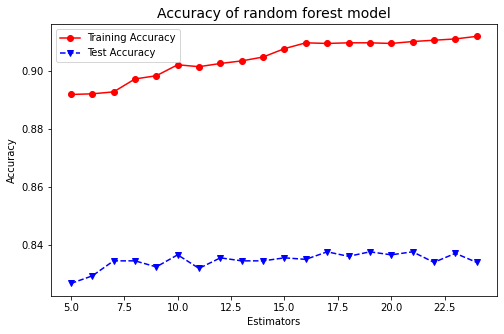

In [11]:
# Separating target variable
df = df_dict_clean['dataset-of-10s']
X = df.drop("target", axis = 1)
y = df['target'].array

# Creating train,test split
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X, y, test_size = 0.3, random_state = 0)

# running multiple random forest models to define optimal estimator
random_forest_estimator(X_train_10, y_train_10, X_test_10, y_test_10, max_depth=10)

According to the plot 10 is the optimal estimator.

In [ ]:
clf_10 = RandomForestClassifier(n_estimators = 10, random_state = 0, max_depth = 10)
clf_10.fit(X_train_10, y_train_10)
y_pred_10 = clf_10.predict(X_test_10)

check_accuracy(y_test_10, y_pred_10)

Confusion Matrix 
 [[724 202]
 [112 882]] 

Accuracy Score 
 0.8365 



#### Random forest models review

Summarizing the results of the six models, they are close to each other, the prediction accuracy varies between 75% and 85%. This is not an extraordinary model, the boosting model used later should overpass it without any problem. Cross-validation was not used in the train-test splits as it is just a baseline model.

Before builing the gradient models, I'm making a short prediction with the models for the next decade to see how they perform.

Text(0.5, 1.0, "Forecasting accuracy of random forest \nmodels on other decades' data")

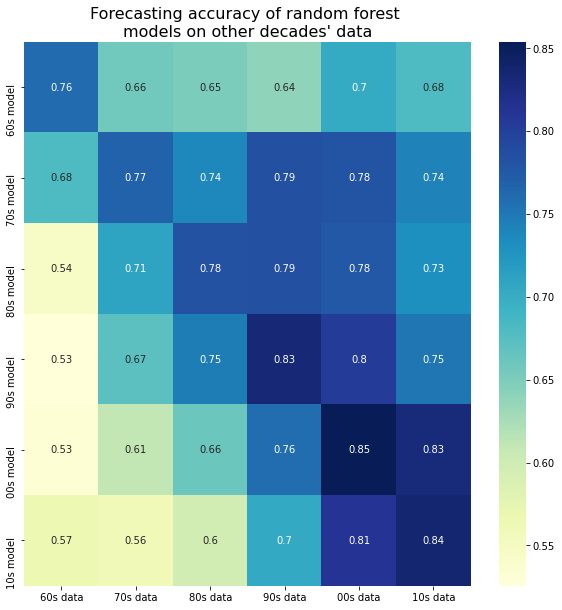

In [ ]:
# list of models and test sets
models = [clf_60, clf_70, clf_80, clf_90, clf_00, clf_10]
X_test_sets = [X_test_60, X_test_70, X_test_80, X_test_90, X_test_00, X_test_10]
y_test_sets = [y_test_60, y_test_70, y_test_80, y_test_90, y_test_00, y_test_10]
labels = ['60 on 70', ' 70 on 80', '80 on 90', '90 on 00', '00 on 10']

#defining empty results set
results = np.zeros((6,6))

#predicting all decades with all models. The first line represents the 60's model's
# prediction for 60's, 70's, etc dataset.
for i, model in enumerate(models):
  for j, decade in enumerate(X_test_sets):
    y_pred = model.predict(X_test_sets[j])
    results[i,j] = accuracy_score(y_test_sets[j], y_pred)

y_values = ['60s model', '70s model', '80s model', '90s model', '00s model', '10s model']
x_values = ['60s data', '70s data', '80s data', '90s data', '00s data', '10s data']

plt.figure(figsize=(10,10))
sns.heatmap(results, annot=True, cmap="YlGnBu", xticklabels=x_values, yticklabels=y_values)
plt.title('Forecasting accuracy of random forest \nmodels on other decades\' data', size = 16)



The 60's is a bit outlier since its model can predict its own test set with 76% accuracy, but performs poorly on the later ones, while the other decades' models perform similarly on the following datasets as on their own.

All models perform poorly on the previous datasets, which is in line with common sense. 

We can suppose music became more standard, less unique as time passed.

## Building Gradient Boosting models

### Dataset of 60's

100%|██████████| 10/10 [01:05<00:00,  6.54s/it]


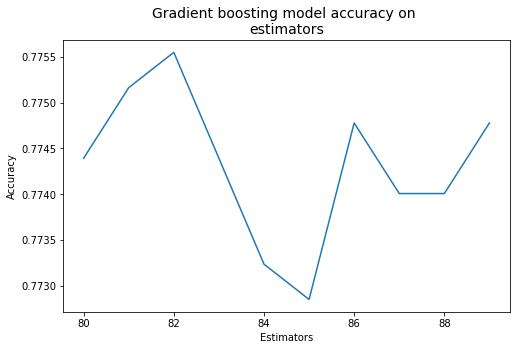

In [15]:
gradient_boosting_estimator(X_train_60, y_train_60, X_test_60, y_test_60, learning_rate = 0.1, max_depth = 10, est_range = range(80,90))
# learning rate, max depth and estimator range is defined after several manual iterations

According to the plot the optimal estimator for 0.1 learning rate is 89. Max depth is set to 10.



In [16]:
grad_60_opt = GradientBoostingClassifier(n_estimators = 89, learning_rate = 0.1, random_state = 0, max_depth=10)
grad_60_opt.fit(X_train_60, y_train_60)

y_pred_grad_60 = grad_60_opt.predict(X_test_60)

check_accuracy(y_test_60, y_pred_grad_60)

Confusion matrix:
[[ 940  356]
 [ 228 1069]]

The accuracy score is 0.7748


### Dataset of 70's

100%|██████████| 15/15 [00:23<00:00,  1.60s/it]


Text(0.5, 1.0, 'Gradient boosting model accuracy on \nestimators')

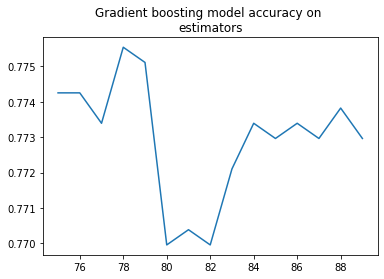

In [ ]:
gradient_boosting_estimator(X_train_70, y_train_70, X_test_70, y_test_70, learning_rate = 0.15, max_depth = 10, est_range = range(75,90))
# learning rate, max depth and estimator range is defined after several manual iterations

According to the plot the optimal estimator for 0.15 learning rate is 86. Max depth is set to 10.

In [ ]:
grad_70_opt = GradientBoostingClassifier(n_estimators = 86, learning_rate = 0.15, random_state = 0, max_depth = 10)
grad_70_opt.fit(X_train_70, y_train_70)

y_pred_grad_70 = grad_70_opt.predict(X_test_70)

check_accuracy(y_test_70, y_pred_grad_70)

Confusion Matrix 
 [[863 294]
 [224 949]] 

Accuracy Score 
 0.7777 



### Dataset of 80's

100%|██████████| 15/15 [00:30<00:00,  2.04s/it]


Text(0.5, 1.0, 'Gradient boosting model accuracy on \nestimators')

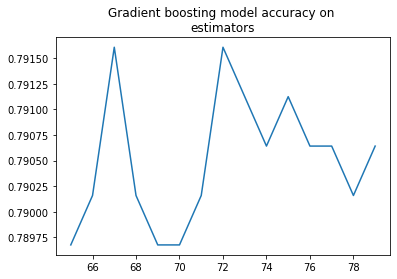

In [ ]:
gradient_boosting_estimator(X_train_80, y_train_80, X_test_80, y_test_80, learning_rate = 0.1, max_depth = 5, est_range = range(65,80))
# learning rate, max depth and estimator range is defined after several manual iterations

According to the plot the optimal estimator for 0.1 learning rate is 67. Max depth is set to 5.

In [ ]:
grad_80_opt = GradientBoostingClassifier(n_estimators = 67, learning_rate = 0.1, random_state = 0, max_depth = 5)
grad_80_opt.fit(X_train_80, y_train_80)

y_pred_grad_80 = grad_80_opt.predict(X_test_80)

check_accuracy(y_test_80, y_pred_grad_80)

Confusion Matrix 
 [[781 261]
 [171 860]] 

Accuracy Score 
 0.7916 



### Dataset of 90's


100%|██████████| 10/10 [00:26<00:00,  2.62s/it]


Text(0.5, 1.0, 'Gradient boosting model accuracy on \nestimators')

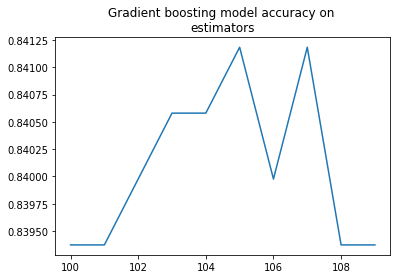

In [ ]:
gradient_boosting_estimator(X_train_90, y_train_90, X_test_90, y_test_90, learning_rate = 0.13, max_depth = 5, est_range = range(100,110))
# learning rate, max depth and estimator range is defined after several manual iterations

According to the plot the optimal estimator for 0.13 learning rate is 105. Max depth is set to 5.

In [ ]:
grad_90_opt = GradientBoostingClassifier(n_estimators = 105, learning_rate = 0.13, random_state = 0, max_depth = 5)
grad_90_opt.fit(X_train_90, y_train_90)

y_pred_grad_90 = grad_90_opt.predict(X_test_90)

check_accuracy(y_test_90, y_pred_grad_90)

Confusion Matrix 
 [[688 148]
 [115 705]] 

Accuracy Score 
 0.8412 



### Dataset of 00's

Text(0.5, 1.0, 'Gradient boosting model accuracy on \nestimators')

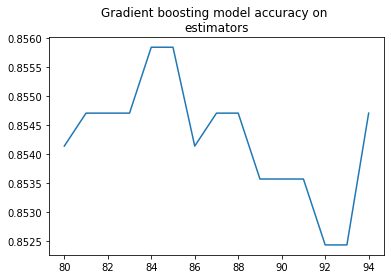

In [ ]:
gradient_boosting_estimator(X_train_00, y_train_00, X_test_00, y_test_00, learning_rate = 0.1, max_depth = 7, est_range = range(80,95))
# learning rate, max depth and estimator range is defined after several manual iterations

According to the plot the optimal estimator for 0.1 learning rate is 84. Max depth is set to 7.

In [ ]:
grad_00_opt = GradientBoostingClassifier(n_estimators = 84, learning_rate = 0.1, random_state = 0, max_depth = 7)
grad_00_opt.fit(X_train_00, y_train_00)

y_pred_grad_00 = grad_00_opt.predict(X_test_00)

check_accuracy(y_test_00, y_pred_grad_00)

Confusion Matrix 
 [[741 140]
 [114 767]] 

Accuracy Score 
 0.8558 



### Dataset of 10's

Text(0.5, 1.0, 'Gradient boosting model accuracy on \nestimators')

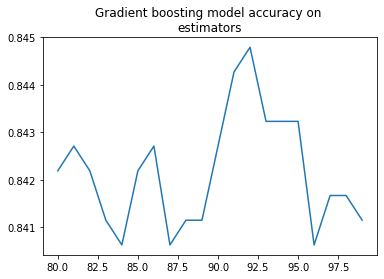

In [ ]:
gradient_boosting_estimator(X_train_10, y_train_10, X_test_10, y_test_10, learning_rate = 0.1, max_depth = 6, est_range = range(80,100))
# learning rate, max depth and estimator range is defined after several manual iterations

According to the plot the optimal estimator for 0.1 learning rate is 92. Max depth is set to 6.

In [ ]:
grad_10_opt = GradientBoostingClassifier(n_estimators = 84, learning_rate = 0.1, random_state = 0, max_depth = 7)
grad_10_opt.fit(X_train_10, y_train_10)

y_pred_grad_10 = grad_10_opt.predict(X_test_10)

check_accuracy(y_test_10, y_pred_grad_10)

Confusion Matrix 
 [[761 165]
 [127 867]] 

Accuracy Score 
 0.8479 



#### Gradient boosting model review

All models performed slightly better than the random forest ones, but the difference is barely visible. I tried to set all parameters of the models as they outperform the random forest models, but it was a hard challenge and the result is not satisfying.

To ensure the random forest models' prediction on the other datasets, the same cross-prediction is done for these models.

Text(0.5, 1.0, "Forecasting accuracy of gradient boosing \nmodels on other decades' data")

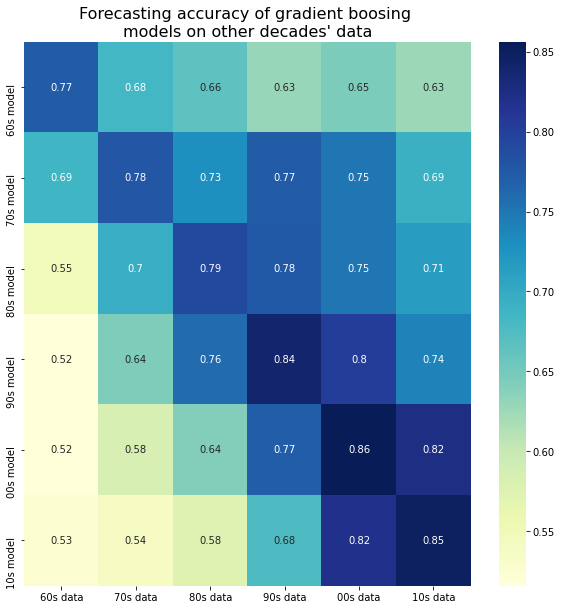

In [ ]:
# list of models and test sets
models = [grad_60_opt, grad_70_opt, grad_80_opt, grad_90_opt, grad_00_opt, grad_10_opt]
X_test_sets = [X_test_60, X_test_70, X_test_80, X_test_90, X_test_00, X_test_10]
y_test_sets = [y_test_60, y_test_70, y_test_80, y_test_90, y_test_00, y_test_10]
labels = ['60 on 70', ' 70 on 80', '80 on 90', '90 on 00', '00 on 10']

#defining empty results set
results = np.zeros((6,6))

#predicting all decades with all models. The first line represents the 60's model's
# prediction for 60's, 70's, etc dataset.
for i, model in enumerate(models):
  for j, decade in enumerate(X_test_sets):
    y_pred = model.predict(X_test_sets[j])
    results[i,j] = accuracy_score(y_test_sets[j], y_pred)

y_values = ['60s model', '70s model', '80s model', '90s model', '00s model', '10s model']
x_values = ['60s data', '70s data', '80s data', '90s data', '00s data', '10s data']

plt.figure(figsize=(10,10))
sns.heatmap(results, annot=True, cmap="YlGnBu", xticklabels=x_values, yticklabels=y_values)
plt.title('Forecasting accuracy of gradient boosing \nmodels on other decades\' data', size = 16)



In conclusion, although the gradient boosting models perform better on the decades' test datasets, they are slightly outperformed by the random forest models in predicting other decade's hits.

We can say that 60's music differs mostly from the other decades' music. From the seventies the hits in each decades could have been predicted almost as efficiently by the previous decade as by the actual decade. 

The prediction efficiency is not too high though, meaning there are other factors that determine whether a song is going to be a hit or not. This lack of information can be the reason why the random forest model was performing almost as good as the gradient boosting models. 
